In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import ast # for converting strings ito tuples

# import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
import plotly.graph_objects as go

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime

# Creating a datetime object
d = datetime.now()

# Converting a to string using strftime
datenow = d.strftime('%Y%m%d')
timenow = d.strftime("%H%M%S")

print(datenow)
print(timenow)

20240604
060738


# Data

We'll be taking the cleaned version used in the 2021 visualizations and pivoting it back into a table with a structure similar to 'survey_multilocations_geocoded.csv", with rows based on Respondent ID and columns based on location

In [3]:
# direct destination by ID

star = pd.read_csv("data_gen/trajectories/star_all_distances.csv", index_col=0)

for i, c in enumerate(star.columns):
    print("{} \t{} \t\tUnique?: {}".format(i, c, star[c].is_unique))

# lat and lon were flipped in 2021 files
print("\nExtents 1: {} - {}".format(star.lat.min(), star.lat.max()))
print("Extents 2: {} - {}".format(star.lon.min(), star.lon.max()))
star = star.rename(columns={'lat':'longitude', 'lon':'latitude'})
star = star.rename(columns={'latitude':'lat', 'longitude':'lon'})
    
star

0 	ID 		Unique?: False
1 	ID_ordered 		Unique?: False
2 	location 		Unique?: False
3 	dist 		Unique?: False
4 	azimuth 		Unique?: False
5 	lat 		Unique?: False
6 	lon 		Unique?: False
7 	location_type 		Unique?: False
8 	max_dist_moves 		Unique?: False
9 	grouping 		Unique?: False
10 	location_l 		Unique?: False
11 	location_near 		Unique?: False
12 	location_country 		Unique?: False
13 	city_8 		Unique?: False
14 	neighborhood_9 		Unique?: False
15 	orig_country_103 		Unique?: False
16 	gender_4 		Unique?: False
17 	employment_status_303 		Unique?: False
18 	number_moves_200 		Unique?: False
19 	work_kind_307 		Unique?: False
20 	migrant_status_3 		Unique?: False
21 	ethnic_group_106 		Unique?: False
22 	mother_tongue_115 		Unique?: False
23 	refugee_214 		Unique?: False
24 	send_money_310 		Unique?: False
25 	financial_support_320 		Unique?: False
26 	retireOrigindist 		Unique?: False
27 	retireOriginaz 		Unique?: False

Extents 1: -176.3838121 - 172.8344077
Extents 2: -43.9800737999

,ID,ID_ordered,location,dist,azimuth,lon,lat,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
0,276785,276785.00,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
1,276785,276785.01,"('Manyatta', 'Kisumu', 'Kenya')",291.141195,2.607973,34.481394,0.333309,202,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
2,276785,276785.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
3,276785,276785.06,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,9,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
4,276788,276788.00,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,-3,-1,Yes,Luo,Swahili,-3,-1,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,0,Working full-time (formal/informal sector),Yes,Mupedi,Sepedi,No,No,No,9.589894,0.658109
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,2,Self-employed (run small business/income gener...,No,Copi,Portuguese,No,Yes,No,11.136970,0.000832
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,0,Working full-time (formal/informal sector),Yes,Tsonga,Xitsonga,No,Yes,No,153.994931,0.151757
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,2,Working full-time (formal/informal sector),Yes,-3,Sotho,No,Yes,No,1287.397014,0.471683


In [4]:
survey = pd.read_csv("data_raw/raw_survey/210615_raw_survey.csv")

for i, c in enumerate(survey.columns):
    print("{} \t{} \t\tUnique?: {}".format(i, c, survey[c].is_unique))

display(survey)

0 	SITE_CODE 		Unique?: True
1 	TARGET_LATITUDE 		Unique?: False
2 	TARGET_LONGITUDE 		Unique?: False
3 	SITE_LATITUDE 		Unique?: False
4 	SITE_LONGITUDE 		Unique?: False
5 	SURVEY DURATION IN MINUTES 		Unique?: False
6 	DATE_UPLOADED 		Unique?: False
7 	3 Migrant 		Unique?: False
8 	4 Gender 		Unique?: False
9 	4 Other Gender 		Unique?: False
10 	5 Quota Check  		Unique?: False
11 	7 Date 		Unique?: False
12 	8 Identify City  		Unique?: False
13 	9 Johannesburg Neighbourhoods 		Unique?: False
14 	9 Accra Neighbourhoods  		Unique?: False
15 	9 Nairobi Neighbourhoods 		Unique?: False
16 	10 Housing Type 		Unique?: False
17 	10 Other Housing 		Unique?: False
18 	100: Village, City or Town 		Unique?: False
19 	100: Village, City or Town Name 		Unique?: False
20 	100b: Neighbourhood 		Unique?: False
21 	101 Nearest Town 		Unique?: False
22 	102 Time to City by Bus 		Unique?: False
23 	103 Country of Origin 		Unique?: False
24 	104 Year of Birth 		Unique?: False
25 	106 Ethnic Group 		Uniqu

,SITE_CODE,TARGET_LATITUDE,TARGET_LONGITUDE,SITE_LATITUDE,SITE_LONGITUDE,SURVEY DURATION IN MINUTES,DATE_UPLOADED,3 Migrant,4 Gender,4 Other Gender,...,236 Current Residence,Migrant Quota Category,237 Returned,238 Places Returned To,Unnamed: 326,Unnamed: 327,Unnamed: 328,Unnamed: 329,Unnamed: 330,Unnamed: 331
0,276785,-1.21003,36.78920,-1.28892,36.80449,139.96,3/4/21,Yes,Male,-1,...,More than 2 years,Medium-Term Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
1,276788,-1.21010,36.78923,-1.28872,36.80430,74.59,3/4/21,Yes,Male,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
2,276802,-1.21010,36.78923,-1.28884,36.80433,244.90,3/5/21,Yes,Male,-1,...,One year exactly or/More than a year,New Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
3,276814,-1.20987,36.78899,-1.28885,36.80435,125.87,3/4/21,Yes,Male,-1,...,More than 2 years,Medium-Term Resident,Yes& I Have,Nakuru^1^~Kisumu^2^,NaN,NaN,NaN,NaN,NaN,NaN
4,276822,-1.20976,36.78888,-1.28873,36.80428,80.18,3/4/21,Yes,Female,-1,...,One year exactly or/More than a year,New Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,297661,-26.18491,28.05547,-26.18380,28.05302,62.78,4/16/21,Yes,Female,-1,...,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN
1640,297663,-26.18395,28.05459,-26.18328,28.05690,73.30,4/16/21,No,Male,-1,...,More than 2 years,Medium-Term Resident,No,-1,NaN,NaN,NaN,NaN,NaN,NaN
1641,297666,-26.18565,28.05295,-26.18387,28.05308,72.04,4/16/21,No,Male,-1,...,More than 2 years,Medium-Term Resident,Yes& I Have,Yeoville^4^~Bloemfontein^2^,NaN,NaN,NaN,NaN,NaN,NaN
1642,297667,-26.18630,28.05320,-26.18374,28.05300,54.73,4/16/21,No,Male,-1,...,One year exactly or/More than a year,New Resident,Yes& I Have,Sandton^10^,NaN,NaN,NaN,NaN,NaN,NaN


# Pivot Table

## Unique index per location

We want to pivot the table to have one location per table cell. \
Since there are multiple locations per 'location type', add a unique number with .cumcount()

Reference: https://stackoverflow.com/questions/39481609/number-duplicates-sequentially-in-pandas-dataframe

In [5]:
# 1 - Subset
# collist = ['ID', 'location_type', 'location']
# collist = ['ID', 'location_type', 'location_l', 'location_near', 'location_country', 'location', 'lat', 'lon', 'dist', 'azimuth']
star_indexed = star.copy()

# 2 - Since there are multiple locations per 'location type', add a unique number with .cumcount()
# Ref: https://stackoverflow.com/questions/39481609/number-duplicates-sequentially-in-pandas-dataframe
print("{} \t\tUnique?: {}".format('ID_ordered', star.ID_ordered.is_unique))
star_indexed['location_type_i'] = star_indexed.groupby(['ID', 'location_type']).cumcount()+1

# 2b - Make columns numbers into strings (Add '00' to single digit)
def colstr(v):
    if v < 10:
        s = str( '00' + str(v) )
    elif v < 100 & v >= 10:
        s = str( '0' + str(v) )
    else:
        s = str( str(v) ) 
    return(s)
        
star_indexed['location_type_str'] = star_indexed['location_type'].apply(colstr)
display(star_indexed[['location_type', 'location_type_str']])

# 3 - Add new columns
star_indexed['location_unique'] = star_indexed['ID'].astype('str') + '-' + star_indexed['location_type_str'].astype('str') + '-' + star_indexed['location_type_i'].astype('str')
star_indexed['location_col'] = 'Q'+star_indexed['location_type_str'].astype('str') + '_' + star_indexed['location_type_i'].astype('str')
print("{} \t\tUnique?: {}".format('location_unique', star_indexed['location_unique'].is_unique))

# 4 - Read strings literally as tuples instead of strings
# star_indexed['location'] = star_indexed['location'].apply(lambda x: ast.literal_eval(str(x)))

display(star_indexed)

matrix_data = star_indexed[['ID', 'location_type', 'location_type_i', 'location_unique', 'location_col', 'location', 'lat', 'lon', 'dist', 'azimuth']]
display(matrix_data)

ID_ordered 		Unique?: False


,location_type,location_type_str
0,100,100
1,202,202
2,202,202
3,9,009
4,100,100
...,...,...
19914,344,344
19915,344,344
19916,344,344
19917,344,344


location_unique 		Unique?: True


,ID,ID_ordered,location,dist,azimuth,lon,lat,location_type,max_dist_moves,grouping,...,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz,location_type_i,location_type_str,location_unique,location_col
0,276785,276785.00,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,Dhluo,No,-3,-3,NaN,NaN,1,100,276785-100-1,Q100_1
1,276785,276785.01,"('Manyatta', 'Kisumu', 'Kenya')",291.141195,2.607973,34.481394,0.333309,202,291.141195,moves200,...,Dhluo,No,-3,-3,NaN,NaN,1,202,276785-202-1,Q202_1
2,276785,276785.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,291.141195,moves200,...,Dhluo,No,-3,-3,NaN,NaN,2,202,276785-202-2,Q202_2
3,276785,276785.06,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,9,291.141195,moves200,...,Dhluo,No,-3,-3,NaN,NaN,1,009,276785-009-1,Q009_1
4,276788,276788.00,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,Swahili,-3,-1,-1,NaN,NaN,1,100,276788-100-1,Q100_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,Sepedi,No,No,No,9.589894,0.658109,1,344,297654-344-1,Q344_1
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,Portuguese,No,Yes,No,11.136970,0.000832,1,344,297655-344-1,Q344_1
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,Xitsonga,No,Yes,No,153.994931,0.151757,1,344,297656-344-1,Q344_1
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,Sotho,No,Yes,No,1287.397014,0.471683,1,344,297660-344-1,Q344_1


,ID,location_type,location_type_i,location_unique,location_col,location,lat,lon,dist,azimuth
0,276785,100,1,276785-100-1,Q100_1,"('Kisumu', 'Kisumu', 'Kenya')",-0.102911,34.754176,245.805142,2.688263
1,276785,202,1,276785-202-1,Q202_1,"('Manyatta', 'Kisumu', 'Kenya')",0.333309,34.481394,291.141195,2.607973
2,276785,202,2,276785-202-2,Q202_2,"('Kawangware', 'Nairobi', 'Kenya')",-1.278463,36.751643,0.010000,3.141593
3,276785,9,1,276785-009-1,Q009_1,"('Kawangware', 'Nairobi', 'Kenya')",-1.278463,36.751643,0.010000,3.141593
4,276788,100,1,276788-100-1,Q100_1,"('Oyugis', 'Oyugis', 'Kenya')",-0.509908,34.734576,234.348325,2.836475
...,...,...,...,...,...,...,...,...,...,...
19914,297654,344,1,297654-344-1,Q344_1,"('Cosmo City', 'Randburg', 'South Africa')",-26.021935,27.930757,20.811756,2.281284
19915,297655,344,1,297655-344-1,Q344_1,"('Matola', 'Maputo', 'South Africa')",-25.867549,29.143194,124.648052,0.248199
19916,297656,344,1,297656-344-1,Q344_1,"('Soweto', 'Johannesburg', 'South Africa')",-26.222778,27.890000,18.535022,-2.924451
19917,297660,344,1,297660-344-1,Q344_1,"('Houghton', 'Johannesburg', 'South Africa')",-34.022894,18.733376,1305.932037,-2.452768


## Pivot with Respondents as Rows and Survey Locations as Columns

In [7]:
# pivot the table
matrix_pivot = matrix_data[['ID', 'location_col', 'location']].pivot(index='ID', columns='location_col', values='location')

print("Unique Index?: \t {}".format(matrix_pivot.index.is_unique))
print("\nNumber of Columns: \t {}".format(len(matrix_pivot.columns)))
print("Number of Columns x4: \t {}".format(len(matrix_pivot.columns)*4)) # anticipated number of cols after unpacking
print("\nNon-null Values: \t {}".format(pd.notna(matrix_pivot).values.sum()))

# fill nan values for individual cols
emptytuple = "('nan', 'nan', 'nan')"
matrix_pivot = matrix_pivot.fillna(emptytuple)

# read strings literally as tuples instead of strings
for i,c in enumerate(matrix_pivot.columns):
    # print('{}\t{}'.format(i,c))
    matrix_pivot[c] = matrix_pivot[c].apply(lambda x: ast.literal_eval(str(x)))

matrix_pivot_cols = list(matrix_pivot.columns)
print(matrix_pivot_cols)

display(matrix_pivot)

Unique Index?: 	 True

Number of Columns: 	 107
Number of Columns x4: 	 428

Non-null Values: 	 19919
['Q009_1', 'Q009_2', 'Q100_1', 'Q100_2', 'Q134_1', 'Q134_2', 'Q134_3', 'Q134_4', 'Q134_5', 'Q134_6', 'Q134_7', 'Q142_1', 'Q142_10', 'Q142_11', 'Q142_2', 'Q142_3', 'Q142_4', 'Q142_5', 'Q142_6', 'Q142_7', 'Q142_8', 'Q142_9', 'Q152_1', 'Q152_2', 'Q152_3', 'Q152_4', 'Q152_5', 'Q152_6', 'Q202_1', 'Q202_2', 'Q202_3', 'Q202_4', 'Q202_5', 'Q206_1', 'Q206_2', 'Q211_1', 'Q214_1', 'Q214_2', 'Q215_1', 'Q219_1', 'Q219_2', 'Q219_3', 'Q225_1', 'Q225_2', 'Q225_3', 'Q225_4', 'Q225_5', 'Q225_6', 'Q225_7', 'Q225_8', 'Q311_1', 'Q311_2', 'Q311_3', 'Q311_4', 'Q311_5', 'Q311_6', 'Q321_1', 'Q321_2', 'Q321_3', 'Q321_4', 'Q340_1', 'Q340_2', 'Q340_3', 'Q340_4', 'Q342_1', 'Q342_2', 'Q342_3', 'Q343_1', 'Q343_2', 'Q343_3', 'Q344_1', 'Q344_2', 'Q344_3', 'Q344_4', 'Q406_1', 'Q406_2', 'Q406_3', 'Q406_4', 'Q406_5', 'Q406_6', 'Q516_1', 'Q516_2', 'Q516_3', 'Q516_4', 'Q701_1', 'Q701_2', 'Q701_3', 'Q703_1', 'Q703_2', 'Q705

location_col,Q009_1,Q009_2,Q100_1,Q100_2,Q134_1,Q134_2,Q134_3,Q134_4,Q134_5,Q134_6,...,Q713_2,Q713_3,Q713_4,Q715_1,Q715_2,Q715_3,Q715_4,Q717_1,Q717_2,Q717_3
ID,,,,,,,,,,,,,,,,,,,,,
276785,"(Kawangware, Nairobi, Kenya)","(nan, nan, nan)","(Kisumu, Kisumu, Kenya)","(nan, nan, nan)","(Kawango, Kisumu, Kenya)","(Kawango, Kisumu, Kenya)","(Kawango, Kisumu, Kenya)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)",...,"(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)"
276788,"(Kawangware, nan, nan)","(nan, nan, nan)","(Oyugis, Oyugis, Kenya)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)",...,"(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)"
276802,"(Kawangware, Nairobi, Kenya)","(nan, nan, nan)","(Oyugis, Oyugis, Kenya)","(nan, nan, nan)","(Awendo, Migori, Kenya)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)",...,"(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(Oyugis, Homabay, Kenya)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(Jomvu, Mombasa, Kenya)","(nan, nan, nan)","(nan, nan, nan)"
276814,"(Kayole, Nairobi, Kenya)","(nan, nan, nan)","(Kisumu, Kisumu, Kenya)","(nan, nan, nan)","(Bondo, Siaya, Kenya)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)",...,"(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)"
276822,"(Kayole, Nairobi, Kenya)","(nan, nan, nan)","(nan, Kisumu, Kenya)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)",...,"(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297661,"(Berea, Johannesburg, South Africa)","(nan, nan, nan)","(Johannesburg, Berea, South Africa)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)",...,"(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(Dubai, Dubai, United Arab Emirates)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(Dubai, Dubai, United Arab Emirates)","(nan, nan, nan)","(nan, nan, nan)"
297663,"(Berea, Johannesburg, South Africa)","(nan, nan, nan)","(Lira City, Lira City, Uganda)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)",...,"(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)"
297666,"(Berea, Johannesburg, South Africa)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)",...,"(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)","(nan, nan, nan)"


In [8]:
# Unpack Values
# A - location
# B - nearest
# C - country

matrix_unpack = matrix_pivot.copy()

for i,c in enumerate(matrix_pivot.columns):
    # print('{}\t{}'.format(i,c))
    c = c
    cA = c + '_A'
    cB = c + '_B'
    cC = c + '_C'
    matrix_unpack[cA] = matrix_unpack[c].apply(lambda x: x[0])
    matrix_unpack[cB] = matrix_unpack[c].apply(lambda x: x[1])
    matrix_unpack[cC] = matrix_unpack[c].apply(lambda x: x[2])

matrix_unpack = matrix_unpack.sort_index(axis=1) # sort columns
matrix_unpack = matrix_unpack.replace(to_replace=['nan'], value=np.nan) # replace single null entries with np.nan

for i,c in enumerate(matrix_unpack.columns):
    print('{}\t{}'.format(i,c))

matrix_unpack['respID'] = matrix_unpack.index

# matrix_unpack.to_csv('data_gen/respondent_location_matrix/respondent_location_matrix.csv')
matrix_unpack

0	Q009_1
1	Q009_1_A
2	Q009_1_B
3	Q009_1_C
4	Q009_2
5	Q009_2_A
6	Q009_2_B
7	Q009_2_C
8	Q100_1
9	Q100_1_A
10	Q100_1_B
11	Q100_1_C
12	Q100_2
13	Q100_2_A
14	Q100_2_B
15	Q100_2_C
16	Q134_1
17	Q134_1_A
18	Q134_1_B
19	Q134_1_C
20	Q134_2
21	Q134_2_A
22	Q134_2_B
23	Q134_2_C
24	Q134_3
25	Q134_3_A
26	Q134_3_B
27	Q134_3_C
28	Q134_4
29	Q134_4_A
30	Q134_4_B
31	Q134_4_C
32	Q134_5
33	Q134_5_A
34	Q134_5_B
35	Q134_5_C
36	Q134_6
37	Q134_6_A
38	Q134_6_B
39	Q134_6_C
40	Q134_7
41	Q134_7_A
42	Q134_7_B
43	Q134_7_C
44	Q142_1
45	Q142_10
46	Q142_10_A
47	Q142_10_B
48	Q142_10_C
49	Q142_11
50	Q142_11_A
51	Q142_11_B
52	Q142_11_C
53	Q142_1_A
54	Q142_1_B
55	Q142_1_C
56	Q142_2
57	Q142_2_A
58	Q142_2_B
59	Q142_2_C
60	Q142_3
61	Q142_3_A
62	Q142_3_B
63	Q142_3_C
64	Q142_4
65	Q142_4_A
66	Q142_4_B
67	Q142_4_C
68	Q142_5
69	Q142_5_A
70	Q142_5_B
71	Q142_5_C
72	Q142_6
73	Q142_6_A
74	Q142_6_B
75	Q142_6_C
76	Q142_7
77	Q142_7_A
78	Q142_7_B
79	Q142_7_C
80	Q142_8
81	Q142_8_A
82	Q142_8_B
83	Q142_8_C
84	Q142_9
85	Q142_9_A
86	Q142_9_B
87

location_col,Q009_1,Q009_1_A,Q009_1_B,Q009_1_C,Q009_2,Q009_2_A,Q009_2_B,Q009_2_C,Q100_1,Q100_1_A,...,Q717_1_C,Q717_2,Q717_2_A,Q717_2_B,Q717_2_C,Q717_3,Q717_3_A,Q717_3_B,Q717_3_C,respID
ID,,,,,,,,,,,,,,,,,,,,,
276785,"(Kawangware, Nairobi, Kenya)",Kawangware,Nairobi,Kenya,"(nan, nan, nan)",NaN,NaN,NaN,"(Kisumu, Kisumu, Kenya)",Kisumu,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,"(nan, nan, nan)",NaN,NaN,NaN,276785
276788,"(Kawangware, nan, nan)",Kawangware,NaN,NaN,"(nan, nan, nan)",NaN,NaN,NaN,"(Oyugis, Oyugis, Kenya)",Oyugis,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,"(nan, nan, nan)",NaN,NaN,NaN,276788
276802,"(Kawangware, Nairobi, Kenya)",Kawangware,Nairobi,Kenya,"(nan, nan, nan)",NaN,NaN,NaN,"(Oyugis, Oyugis, Kenya)",Oyugis,...,Kenya,"(nan, nan, nan)",NaN,NaN,NaN,"(nan, nan, nan)",NaN,NaN,NaN,276802
276814,"(Kayole, Nairobi, Kenya)",Kayole,Nairobi,Kenya,"(nan, nan, nan)",NaN,NaN,NaN,"(Kisumu, Kisumu, Kenya)",Kisumu,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,"(nan, nan, nan)",NaN,NaN,NaN,276814
276822,"(Kayole, Nairobi, Kenya)",Kayole,Nairobi,Kenya,"(nan, nan, nan)",NaN,NaN,NaN,"(nan, Kisumu, Kenya)",NaN,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,"(nan, nan, nan)",NaN,NaN,NaN,276822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297661,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,"(nan, nan, nan)",NaN,NaN,NaN,"(Johannesburg, Berea, South Africa)",Johannesburg,...,United Arab Emirates,"(nan, nan, nan)",NaN,NaN,NaN,"(nan, nan, nan)",NaN,NaN,NaN,297661
297663,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,"(nan, nan, nan)",NaN,NaN,NaN,"(Lira City, Lira City, Uganda)",Lira City,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,"(nan, nan, nan)",NaN,NaN,NaN,297663
297666,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,"(nan, nan, nan)",NaN,NaN,NaN,"(nan, nan, nan)",NaN,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,"(nan, nan, nan)",NaN,NaN,NaN,297666


# Add back Geographic Information

## Distances + Lat-Lon
### Data:
* star_all_distances.csv

Add back the distance information from 2021 visualizations by Dare.

In [9]:
matrix_merge = matrix_data[['ID', 'location', 'lat', 'lon', 'dist', 'azimuth']].rename(columns={'ID':'respID'})

matrix_merge['location'] = matrix_merge['location'].apply(lambda x: ast.literal_eval(str(x)))
display(matrix_merge)

matrix_merge = matrix_merge.drop_duplicates(['respID', 'location', 'lat', 'lon', 'dist', 'azimuth'])
display(matrix_merge)

matrix_merge = matrix_merge.drop_duplicates(['respID', 'location'])
display(matrix_merge)

for i, c in enumerate(matrix_merge.columns):
    print("{} {} unique?:\t{}".format(i, c, matrix_merge[c].is_unique))

,respID,location,lat,lon,dist,azimuth
0,276785,"(Kisumu, Kisumu, Kenya)",-0.102911,34.754176,245.805142,2.688263
1,276785,"(Manyatta, Kisumu, Kenya)",0.333309,34.481394,291.141195,2.607973
2,276785,"(Kawangware, Nairobi, Kenya)",-1.278463,36.751643,0.010000,3.141593
3,276785,"(Kawangware, Nairobi, Kenya)",-1.278463,36.751643,0.010000,3.141593
4,276788,"(Oyugis, Oyugis, Kenya)",-0.509908,34.734576,234.348325,2.836475
...,...,...,...,...,...,...
19914,297654,"(Cosmo City, Randburg, South Africa)",-26.021935,27.930757,20.811756,2.281284
19915,297655,"(Matola, Maputo, South Africa)",-25.867549,29.143194,124.648052,0.248199
19916,297656,"(Soweto, Johannesburg, South Africa)",-26.222778,27.890000,18.535022,-2.924451
19917,297660,"(Houghton, Johannesburg, South Africa)",-34.022894,18.733376,1305.932037,-2.452768


,respID,location,lat,lon,dist,azimuth
0,276785,"(Kisumu, Kisumu, Kenya)",-0.102911,34.754176,245.805142,2.688263
1,276785,"(Manyatta, Kisumu, Kenya)",0.333309,34.481394,291.141195,2.607973
2,276785,"(Kawangware, Nairobi, Kenya)",-1.278463,36.751643,0.010000,3.141593
4,276788,"(Oyugis, Oyugis, Kenya)",-0.509908,34.734576,234.348325,2.836475
5,276788,"(Kawangware, nan, nan)",-1.278463,36.751643,0.010000,3.141593
...,...,...,...,...,...,...
19894,296845,"(Norwood, Norwood, South Africa)",-33.925833,18.578056,1313.835097,-2.466903
19896,296848,"(Spruitview, Germiston, South Africa)",-26.321111,28.183056,19.821566,-0.758798
19907,297290,"(Meyerton, Vereeniging, South Africa)",-26.558333,28.019722,37.169594,-1.669632
19911,297628,"(Forest Town, Johannesburg, South Africa)",-26.172778,28.036667,2.067283,2.675706


,respID,location,lat,lon,dist,azimuth
0,276785,"(Kisumu, Kisumu, Kenya)",-0.102911,34.754176,245.805142,2.688263
1,276785,"(Manyatta, Kisumu, Kenya)",0.333309,34.481394,291.141195,2.607973
2,276785,"(Kawangware, Nairobi, Kenya)",-1.278463,36.751643,0.010000,3.141593
4,276788,"(Oyugis, Oyugis, Kenya)",-0.509908,34.734576,234.348325,2.836475
5,276788,"(Kawangware, nan, nan)",-1.278463,36.751643,0.010000,3.141593
...,...,...,...,...,...,...
19894,296845,"(Norwood, Norwood, South Africa)",-33.925833,18.578056,1313.835097,-2.466903
19896,296848,"(Spruitview, Germiston, South Africa)",-26.321111,28.183056,19.821566,-0.758798
19907,297290,"(Meyerton, Vereeniging, South Africa)",-26.558333,28.019722,37.169594,-1.669632
19911,297628,"(Forest Town, Johannesburg, South Africa)",-26.172778,28.036667,2.067283,2.675706


0 respID unique?:	False
1 location unique?:	False
2 lat unique?:	False
3 lon unique?:	False
4 dist unique?:	False
5 azimuth unique?:	False


### [A] Respondent-Location Matrix: Lat-Lon & Distances

In [10]:
matrix_latlon = matrix_unpack.copy()

for i,c in enumerate(matrix_pivot_cols):
    merge = matrix_merge.rename(columns={'location':c, 'lat':str( c + '_lat'), 'lon':str( c + '_lon'), 'dist':str( c + '_dist'), 'azimuth':str( c + '_azim')})
    matrix_latlon = pd.merge(matrix_latlon, merge, left_on=['respID', c], right_on=['respID', c], how='left', copy=False)
    # matrix_latlon = matrix_latlon.drop(columns=['location', 'respID'])

matrix_latlon = matrix_latlon.sort_index(axis=1) # sort columns
print(matrix_latlon['respID'].is_unique)
matrix_latlon['ID'] = matrix_latlon['respID']
matrix_latlon = matrix_latlon.set_index('ID')

# matrix_latlon.to_csv('data_gen/respondent_location_matrix/respondent_location_matrix.csv')
matrix_latlon

True


,Q009_1,Q009_1_A,Q009_1_B,Q009_1_C,Q009_1_azim,Q009_1_dist,Q009_1_lat,Q009_1_lon,Q009_2,Q009_2_A,...,Q717_2_lon,Q717_3,Q717_3_A,Q717_3_B,Q717_3_C,Q717_3_azim,Q717_3_dist,Q717_3_lat,Q717_3_lon,respID
ID,,,,,,,,,,,,,,,,,,,,,
276785,"(Kawangware, Nairobi, Kenya)",Kawangware,Nairobi,Kenya,3.141593,0.01,-1.278463,36.751643,"(nan, nan, nan)",NaN,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,276785
276788,"(Kawangware, nan, nan)",Kawangware,NaN,NaN,3.141593,0.01,-1.278463,36.751643,"(nan, nan, nan)",NaN,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,276788
276802,"(Kawangware, Nairobi, Kenya)",Kawangware,Nairobi,Kenya,3.141593,0.01,-1.278463,36.751643,"(nan, nan, nan)",NaN,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,276802
276814,"(Kayole, Nairobi, Kenya)",Kayole,Nairobi,Kenya,3.141593,0.01,-1.265984,36.916945,"(nan, nan, nan)",NaN,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,276814
276822,"(Kayole, Nairobi, Kenya)",Kayole,Nairobi,Kenya,3.141593,0.01,-1.265984,36.916945,"(nan, nan, nan)",NaN,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,276822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297661,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,3.141593,0.01,-26.182222,28.053333,"(nan, nan, nan)",NaN,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,297661
297663,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,3.141593,0.01,-26.182222,28.053333,"(nan, nan, nan)",NaN,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,297663
297666,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,3.141593,0.01,-26.182222,28.053333,"(nan, nan, nan)",NaN,...,NaN,"(nan, nan, nan)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,297666


# Urban-Rural
## Urban/Non-Urban Clusters Data
* All_Sites_AfricaOnly_UrbanCluster.shp
* All_Sites_AfricaOnly_NonUrbanCluster.shp

This merges back the urban and non-urban classified locations per Wei's work during Winter 2023
(2104_mobilities_temporalities/02_data/2023_GIS/GIS/UrbanNonUrban_SHP/)

In [16]:
fol = "data_gen/urban_nonurban_clusters/"

In [17]:
"""
URBAN CLUSTERS CLASSIFICATION
"""

uc = gpd.read_file(str(fol + 'All_Sites_AfricaOnly_UrbanCluster.shp'))

print(uc.ind.is_unique)
print(uc.OBJECTID.is_unique)
print(uc.FID_All_Si.is_unique)
print(uc.FID_All__1.is_unique)
print(uc.geometry.is_unique)
for i,c in enumerate(uc.columns):
    print('{}\t{}'.format(i,c))

display(uc)
    
uc = uc.drop_duplicates(['ind', 'lat', 'lng', 'geometry'])

uc

False
True
True
True
False
0	OBJECTID
1	FID_All_Si
2	FID_All__1
3	ind
4	lat
5	lng
6	FID_Africa
7	FID_1
8	CONTINENT
9	SQMI
10	SQKM
11	Shape__Are
12	Shape__Len
13	FID_Afri_1
14	fid_12
15	DN
16	geometry


,OBJECTID,FID_All_Si,FID_All__1,ind,lat,lng,FID_Africa,FID_1,CONTINENT,SQMI,SQKM,Shape__Are,Shape__Len,FID_Afri_1,fid_12,DN,geometry
0,1,1,1304,South Africa_ Scarborough_Scarborough,-34.197473,18.375555,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,6520,7736.0,1,POINT (18.37555 -34.19747)
1,2,2,1973,South Africa_ Durban_Scarborough,-34.197473,18.375555,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,6520,7736.0,1,POINT (18.37555 -34.19747)
2,3,4,1201,South Africa_ Heidelberg_Heidelberg,-34.089958,20.958589,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,6505,7720.0,1,POINT (20.95859 -34.08996)
3,4,5,2792,South Africa_ Harare_Harare,-34.057685,18.673492,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,6509,7725.0,1,POINT (18.67349 -34.05769)
4,5,6,3049,South Africa_ Harare_Chitungwiza,-34.057685,18.673492,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,6509,7725.0,1,POINT (18.67349 -34.05769)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,2327,3320,2418,Libya_ Tripoli_nan,32.896672,13.177792,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,313,347.0,1,POINT (13.17779 32.89667)
2327,2328,3321,2788,Libya_ Tripoli_Tripoli,32.896672,13.177792,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,313,347.0,1,POINT (13.17779 32.89667)
2328,2329,3322,3521,Morocco_ Casablanca_Casablanca,33.595063,-7.618777,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,259,285.0,1,POINT (-7.61878 33.59506)
2329,2330,3323,3147,Morocco_ Rabat_Rabat,34.022405,-6.834543,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,223,247.0,1,POINT (-6.83454 34.02241)


,OBJECTID,FID_All_Si,FID_All__1,ind,lat,lng,FID_Africa,FID_1,CONTINENT,SQMI,SQKM,Shape__Are,Shape__Len,FID_Afri_1,fid_12,DN,geometry
0,1,1,1304,South Africa_ Scarborough_Scarborough,-34.197473,18.375555,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,6520,7736.0,1,POINT (18.37555 -34.19747)
1,2,2,1973,South Africa_ Durban_Scarborough,-34.197473,18.375555,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,6520,7736.0,1,POINT (18.37555 -34.19747)
2,3,4,1201,South Africa_ Heidelberg_Heidelberg,-34.089958,20.958589,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,6505,7720.0,1,POINT (20.95859 -34.08996)
3,4,5,2792,South Africa_ Harare_Harare,-34.057685,18.673492,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,6509,7725.0,1,POINT (18.67349 -34.05769)
4,5,6,3049,South Africa_ Harare_Chitungwiza,-34.057685,18.673492,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,6509,7725.0,1,POINT (18.67349 -34.05769)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,2327,3320,2418,Libya_ Tripoli_nan,32.896672,13.177792,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,313,347.0,1,POINT (13.17779 32.89667)
2327,2328,3321,2788,Libya_ Tripoli_Tripoli,32.896672,13.177792,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,313,347.0,1,POINT (13.17779 32.89667)
2328,2329,3322,3521,Morocco_ Casablanca_Casablanca,33.595063,-7.618777,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,259,285.0,1,POINT (-7.61878 33.59506)
2329,2330,3323,3147,Morocco_ Rabat_Rabat,34.022405,-6.834543,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,223,247.0,1,POINT (-6.83454 34.02241)


In [18]:
"""
NON-URBAN CLUSTERS CLASSIFICATION
"""

nuc = gpd.read_file(str(fol + 'All_Sites_AfricaOnly_NonUrbanCluster.shp'))

print(nuc.ind.is_unique)
print(nuc.OBJECTID.is_unique)
print(nuc.FID_All_Si.is_unique)
print(uc.geometry.is_unique)
for i,c in enumerate(nuc.columns):
    print('{}\t{}'.format(i,c))

display(nuc)

nuc = nuc.drop_duplicates(['ind', 'lat', 'lng', 'geometry'])

nuc

False
True
True
False
0	OBJECTID
1	FID_All_Si
2	ind
3	lat
4	lng
5	FID_Africa
6	FID_1
7	CONTINENT
8	SQMI
9	SQKM
10	Shape__Are
11	Shape__Len
12	geometry


,OBJECTID,FID_All_Si,ind,lat,lng,FID_Africa,FID_1,CONTINENT,SQMI,SQKM,Shape__Are,Shape__Len,geometry
0,3,940,South Africa_ Westonaria_Lebanon,-34.183168,19.127454,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (19.12745 -34.18317)
1,19,3355,South Africa_ Cape Town_Philippi,-34.001796,18.547423,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (18.54742 -34.00180)
2,31,1927,South Africa_ Dennilton_Blompot,-33.966576,22.605604,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (22.60560 -33.96658)
3,48,3423,South Africa_ Cape Town_Tygerberg,-33.853814,18.588630,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (18.58863 -33.85381)
4,50,825,South Africa_ Johannesburg_Alexander,-33.784552,25.420451,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (25.42045 -33.78455)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,3312,1570,Niger_ Agadez_Alarsas,17.013053,8.007548,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (8.00755 17.01305)
989,3313,2558,Niger_ Agadez_Bilma,18.692930,12.918720,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (12.91872 18.69293)
990,3314,1367,Sudan_ Khartoum_Nubian,21.455306,34.871464,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (34.87146 21.45531)
991,3315,3351,Egypt_ Egypt_Egypt,26.254049,29.267547,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (29.26755 26.25405)


,OBJECTID,FID_All_Si,ind,lat,lng,FID_Africa,FID_1,CONTINENT,SQMI,SQKM,Shape__Are,Shape__Len,geometry
0,3,940,South Africa_ Westonaria_Lebanon,-34.183168,19.127454,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (19.12745 -34.18317)
1,19,3355,South Africa_ Cape Town_Philippi,-34.001796,18.547423,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (18.54742 -34.00180)
2,31,1927,South Africa_ Dennilton_Blompot,-33.966576,22.605604,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (22.60560 -33.96658)
3,48,3423,South Africa_ Cape Town_Tygerberg,-33.853814,18.588630,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (18.58863 -33.85381)
4,50,825,South Africa_ Johannesburg_Alexander,-33.784552,25.420451,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (25.42045 -33.78455)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,3312,1570,Niger_ Agadez_Alarsas,17.013053,8.007548,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (8.00755 17.01305)
989,3313,2558,Niger_ Agadez_Bilma,18.692930,12.918720,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (12.91872 18.69293)
990,3314,1367,Sudan_ Khartoum_Nubian,21.455306,34.871464,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (34.87146 21.45531)
991,3315,3351,Egypt_ Egypt_Egypt,26.254049,29.267547,0,1,Africa,1.158346e+07,3.000115e+07,3.353511e+13,4.914480e+07,POINT (29.26755 26.25405)


In [19]:
# concatenate urban rural
urcols = ['FID_All_Si', 'ind', 'lat', 'lng', 'geometry']
urcols_rename = {'FID_All_Si':'UR_FID', 'ind':'UR_ind', 'lng':'lon'}
uc_ = uc[urcols].rename(columns=urcols_rename)
nuc_ = nuc[urcols].rename(columns=urcols_rename)

# add categories
uc_['UR_UN'] = 'Urban'
nuc_['UR_UN'] = 'Non-Urban'

display(uc_)
display(nuc_)

# check if ID is unique among both
ur = pd.concat([uc_, nuc_], axis=0)
print(ur['UR_FID'].is_unique)

if ur['UR_FID'].is_unique == False:
    ur = ur.drop(columns='UR_FID')

display(ur)
    
# check duplicates
ur = ur.drop_duplicates(['UR_ind', 'lat', 'lon'])

for i, c in enumerate(ur.columns):
    print("{} {} unique?:\t{}".format(i, c, ur[c].is_unique))

display(ur)

,UR_FID,UR_ind,lat,lon,geometry,UR_UN
0,1,South Africa_ Scarborough_Scarborough,-34.197473,18.375555,POINT (18.37555 -34.19747),Urban
1,2,South Africa_ Durban_Scarborough,-34.197473,18.375555,POINT (18.37555 -34.19747),Urban
2,4,South Africa_ Heidelberg_Heidelberg,-34.089958,20.958589,POINT (20.95859 -34.08996),Urban
3,5,South Africa_ Harare_Harare,-34.057685,18.673492,POINT (18.67349 -34.05769),Urban
4,6,South Africa_ Harare_Chitungwiza,-34.057685,18.673492,POINT (18.67349 -34.05769),Urban
...,...,...,...,...,...,...
2326,3320,Libya_ Tripoli_nan,32.896672,13.177792,POINT (13.17779 32.89667),Urban
2327,3321,Libya_ Tripoli_Tripoli,32.896672,13.177792,POINT (13.17779 32.89667),Urban
2328,3322,Morocco_ Casablanca_Casablanca,33.595063,-7.618777,POINT (-7.61878 33.59506),Urban
2329,3323,Morocco_ Rabat_Rabat,34.022405,-6.834543,POINT (-6.83454 34.02241),Urban


,UR_FID,UR_ind,lat,lon,geometry,UR_UN
0,940,South Africa_ Westonaria_Lebanon,-34.183168,19.127454,POINT (19.12745 -34.18317),Non-Urban
1,3355,South Africa_ Cape Town_Philippi,-34.001796,18.547423,POINT (18.54742 -34.00180),Non-Urban
2,1927,South Africa_ Dennilton_Blompot,-33.966576,22.605604,POINT (22.60560 -33.96658),Non-Urban
3,3423,South Africa_ Cape Town_Tygerberg,-33.853814,18.588630,POINT (18.58863 -33.85381),Non-Urban
4,825,South Africa_ Johannesburg_Alexander,-33.784552,25.420451,POINT (25.42045 -33.78455),Non-Urban
...,...,...,...,...,...,...
988,1570,Niger_ Agadez_Alarsas,17.013053,8.007548,POINT (8.00755 17.01305),Non-Urban
989,2558,Niger_ Agadez_Bilma,18.692930,12.918720,POINT (12.91872 18.69293),Non-Urban
990,1367,Sudan_ Khartoum_Nubian,21.455306,34.871464,POINT (34.87146 21.45531),Non-Urban
991,3351,Egypt_ Egypt_Egypt,26.254049,29.267547,POINT (29.26755 26.25405),Non-Urban


False


,UR_ind,lat,lon,geometry,UR_UN
0,South Africa_ Scarborough_Scarborough,-34.197473,18.375555,POINT (18.37555 -34.19747),Urban
1,South Africa_ Durban_Scarborough,-34.197473,18.375555,POINT (18.37555 -34.19747),Urban
2,South Africa_ Heidelberg_Heidelberg,-34.089958,20.958589,POINT (20.95859 -34.08996),Urban
3,South Africa_ Harare_Harare,-34.057685,18.673492,POINT (18.67349 -34.05769),Urban
4,South Africa_ Harare_Chitungwiza,-34.057685,18.673492,POINT (18.67349 -34.05769),Urban
...,...,...,...,...,...
988,Niger_ Agadez_Alarsas,17.013053,8.007548,POINT (8.00755 17.01305),Non-Urban
989,Niger_ Agadez_Bilma,18.692930,12.918720,POINT (12.91872 18.69293),Non-Urban
990,Sudan_ Khartoum_Nubian,21.455306,34.871464,POINT (34.87146 21.45531),Non-Urban
991,Egypt_ Egypt_Egypt,26.254049,29.267547,POINT (29.26755 26.25405),Non-Urban


0 UR_ind unique?:	True
1 lat unique?:	False
2 lon unique?:	False
3 geometry unique?:	False
4 UR_UN unique?:	False


,UR_ind,lat,lon,geometry,UR_UN
0,South Africa_ Scarborough_Scarborough,-34.197473,18.375555,POINT (18.37555 -34.19747),Urban
1,South Africa_ Durban_Scarborough,-34.197473,18.375555,POINT (18.37555 -34.19747),Urban
2,South Africa_ Heidelberg_Heidelberg,-34.089958,20.958589,POINT (20.95859 -34.08996),Urban
3,South Africa_ Harare_Harare,-34.057685,18.673492,POINT (18.67349 -34.05769),Urban
4,South Africa_ Harare_Chitungwiza,-34.057685,18.673492,POINT (18.67349 -34.05769),Urban
...,...,...,...,...,...
988,Niger_ Agadez_Alarsas,17.013053,8.007548,POINT (8.00755 17.01305),Non-Urban
989,Niger_ Agadez_Bilma,18.692930,12.918720,POINT (12.91872 18.69293),Non-Urban
990,Sudan_ Khartoum_Nubian,21.455306,34.871464,POINT (34.87146 21.45531),Non-Urban
991,Egypt_ Egypt_Egypt,26.254049,29.267547,POINT (29.26755 26.25405),Non-Urban


## [A] Respondent-Location Matrix: Urban-Rural

### Urban and Rural Classes

In [20]:
matrix_ur = matrix_latlon.copy()

# 1. Merge back to lat-lon / distance table

latcol_list = []
loncol_list = []
geomcol_list = []
uruncol_list = []

for i,c in enumerate(matrix_pivot_cols):
    
    # 1.1 - create index to match urban-rural dataframe
    matrix_ur['UR_ind'] = matrix_ur[c + '_C'].astype('str') + '_ ' + matrix_ur[c + '_B'].astype('str') + '_' + matrix_ur[c + '_A'].astype('str')
    
    # 1.2 - rename and match columns from urban-rural dataframe
    latcol = str( c + '_lat' )
    loncol = str( c + '_lon' )
    geomcol = str( c + '_pt' )
    uruncol = str( c + '_URUN' )
    merge = ur.rename(columns={'lat':latcol, 'lon':loncol, 'geometry':geomcol, 'UR_UN':uruncol})
    
    latcol_list = latcol_list + [latcol]
    loncol_list = loncol_list + [loncol]
    geomcol_list = geomcol_list + [geomcol]
    uruncol_list = uruncol_list + [uruncol]
    
    # 1.3 - methods of merging
    # matrix_ur = pd.merge(matrix_ur, merge, left_on=['UR_ind', latcol, loncol], right_on=['UR_ind', latcol, loncol], how='left', copy=False) # Name and latlon - fewer results
    matrix_ur = pd.merge(matrix_ur, merge[['UR_ind', uruncol, geomcol]], on='UR_ind', how='left', copy=False) # Only on name - more results
    # matrix_ur = pd.merge(matrix_ur, merge[[latcol, loncol, uruncol, geomcol]], on=[latcol, loncol], how='left', copy=False) # on lat lon - take a long time
    
    # 1.4 - drop index column before starting on next one
    matrix_ur = matrix_ur.drop(columns=['UR_ind'])
    # matrix_ur = matrix_ur.drop(columns=['location', 'respID'])

# display(matrix_ur)
    
# 2. Fix index
matrix_ur = matrix_ur.sort_index(axis=1) # sort columns
print(matrix_ur['respID'].is_unique)
matrix_ur['ID'] = matrix_ur['respID']
matrix_ur = matrix_ur.set_index('ID')

# 3. Grab Urban-Rural reponses from survey for comparison
survey_ur = survey[["SITE_CODE", "100: Village, City or Town"]] # subset "100: Village, City or Town" from ACMS Survey
survey_ur = survey_ur.rename(columns={"SITE_CODE":"ID", "100: Village, City or Town":"Q100_1_URACMS"}).set_index("ID")
print("\nURBAN RURAL RESPONSES FROM SURVEY")
display(survey_ur)

matrix_ur = pd.merge(matrix_ur, survey_ur, how='left', left_index=True, right_index=True) # merge 100 column

matrix_ur["Q100_1_URUN"] = matrix_ur["Q100_1_URUN"].fillna('Unclassified') # replace nan values for clean string
matrix_ur["Q100_1_URACMS"] = matrix_ur["Q100_1_URACMS"].fillna('Non-Response') # replace nan values for clean string
matrix_ur['Q100_1_URX'] = matrix_ur['Q100_1_URUN'].astype('str') + " " + matrix_ur['Q100_1_URACMS'].astype('str') # combined WPP and response column

# Export

matrix_ur = matrix_ur.sort_index(axis=1) # sort columns
matrix_ur.to_csv('data_gen/respondent_location_matrix/respondent_location_matrix.csv') # export to csv

print( matrix_ur['Q100_1_URUN'].value_counts() )
print( matrix_ur['Q100_1_URACMS'].value_counts() )
display(matrix_ur[['Q100_1', 'Q100_1_URUN', 'Q100_1_URACMS', 'Q100_1_URX']])
display(matrix_ur)

True

URBAN RURAL RESPONSES FROM SURVEY


,Q100_1_URACMS
ID,
276785,Town
276788,Village
276802,Town
276814,Village
276822,City
...,...
297661,City
297663,Village
297666,Village


Q100_1_URUN
Urban           1139
Non-Urban        350
Unclassified     155
Name: count, dtype: int64
Q100_1_URACMS
Village    713
Town       642
City       289
Name: count, dtype: int64


,Q100_1,Q100_1_URUN,Q100_1_URACMS,Q100_1_URX
ID,,,,
276785,"(Kisumu, Kisumu, Kenya)",Urban,Town,Urban Town
276788,"(Oyugis, Oyugis, Kenya)",Urban,Village,Urban Village
276802,"(Oyugis, Oyugis, Kenya)",Urban,Town,Urban Town
276814,"(Kisumu, Kisumu, Kenya)",Urban,Village,Urban Village
276822,"(nan, Kisumu, Kenya)",Urban,City,Urban City
...,...,...,...,...
297661,"(Johannesburg, Berea, South Africa)",Urban,City,Urban City
297663,"(Lira City, Lira City, Uganda)",Urban,Village,Urban Village
297666,"(nan, nan, nan)",Unclassified,Village,Unclassified Village


,Q009_1,Q009_1_A,Q009_1_B,Q009_1_C,Q009_1_URUN,Q009_1_azim,Q009_1_dist,Q009_1_lat,Q009_1_lon,Q009_1_pt,...,Q717_3_A,Q717_3_B,Q717_3_C,Q717_3_URUN,Q717_3_azim,Q717_3_dist,Q717_3_lat,Q717_3_lon,Q717_3_pt,respID
ID,,,,,,,,,,,,,,,,,,,,,
276785,"(Kawangware, Nairobi, Kenya)",Kawangware,Nairobi,Kenya,Urban,3.141593,0.01,-1.278463,36.751643,POINT (36.75164 -1.27846),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,276785
276788,"(Kawangware, nan, nan)",Kawangware,NaN,NaN,Urban,3.141593,0.01,-1.278463,36.751643,POINT (36.75164 -1.27846),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,276788
276802,"(Kawangware, Nairobi, Kenya)",Kawangware,Nairobi,Kenya,Urban,3.141593,0.01,-1.278463,36.751643,POINT (36.75164 -1.27846),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,276802
276814,"(Kayole, Nairobi, Kenya)",Kayole,Nairobi,Kenya,Urban,3.141593,0.01,-1.265984,36.916945,POINT (36.91695 -1.26598),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,276814
276822,"(Kayole, Nairobi, Kenya)",Kayole,Nairobi,Kenya,Urban,3.141593,0.01,-1.265984,36.916945,POINT (36.91695 -1.26598),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,276822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297661,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,Urban,3.141593,0.01,-26.182222,28.053333,POINT (28.05333 -26.18222),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,297661
297663,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,Urban,3.141593,0.01,-26.182222,28.053333,POINT (28.05333 -26.18222),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,297663
297666,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,Urban,3.141593,0.01,-26.182222,28.053333,POINT (28.05333 -26.18222),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,297666


### Metrics: DEGURBA Class by Groups

In [24]:
ur_counts = matrix_ur[uruncol_list].apply(pd.Series.value_counts).fillna(0)

ur_counts.to_csv('data_gen/urbanrural/respondentcounts_DEGURBA_PerQuestion.csv'.format(datenow))
ur_counts

,Q009_1_URUN,Q009_2_URUN,Q100_1_URUN,Q100_2_URUN,Q134_1_URUN,Q134_2_URUN,Q134_3_URUN,Q134_4_URUN,Q134_5_URUN,Q134_6_URUN,...,Q713_2_URUN,Q713_3_URUN,Q713_4_URUN,Q715_1_URUN,Q715_2_URUN,Q715_3_URUN,Q715_4_URUN,Q717_1_URUN,Q717_2_URUN,Q717_3_URUN
Non-Urban,0.0,0.0,350,0.0,332.0,124.0,45.0,10.0,4.0,4.0,...,1.0,0.0,0.0,234.0,1.0,2.0,2.0,97.0,1.0,0.0
Unclassified,0.0,0.0,155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Urban,1644.0,5.0,1139,5.0,798.0,273.0,114.0,45.0,9.0,3.0,...,4.0,1.0,0.0,711.0,4.0,3.0,3.0,430.0,7.0,1.0


In [25]:
ur_city = matrix_ur[[ 'Q009_1_B', 'Q100_1_URUN', 'respID']].groupby( ['Q009_1_B', 'Q100_1_URUN'] ).count()
display(ur_city)

ur_city.to_csv('data_gen/urbanrural/respondentcounts_DEGURBA_PerCity.csv'.format(datenow))

respID
Q009_1_B     Q100_1_URUN         
Accra        Non-Urban        142
             Unclassified      49
             Urban            320
Johannesburg Non-Urban         58
             Unclassified      58
             Urban            299
Nairobi      Non-Urban        136
             Unclassified      43
             Urban            304

In [26]:
ur_neighborhood = matrix_ur[[ 'Q009_1_B', 'Q009_1_A', 'Q100_1_URUN', 'respID']].groupby( ['Q009_1_B', 'Q009_1_A', 'Q100_1_URUN'] ).count()
display(ur_neighborhood)

ur_neighborhood.to_csv('data_gen/urbanrural/respondentcounts_DEGURBA_PerNeighbohood.csv')

respID
Q009_1_B     Q009_1_A      Q100_1_URUN         
Accra        James Town    Non-Urban         39
                           Unclassified      16
                           Urban             82
             Madina        Non-Urban         46
                           Unclassified      15
                           Urban            161
             Old Fadama    Non-Urban         57
                           Unclassified      18
                           Urban             77
Johannesburg Berea         Non-Urban         27
                           Unclassified      22
                           Urban            134
             Diepsloot     Non-Urban         12
                           Unclassified      22
                           Urban             85
             Katlehong     Non-Urban         19
                           Unclassified      14
                           Urban             79
             Kayole        Urban              1
Nairobi      Kawangware    Non-Urban         36
                           Unclassified      18
                           Urban            125
             Kayole        Non-Urban         40
                           Unclassified      12
                           Urban            100
             Ongata Rongai Non-Urban         60
                           Unclassified      13
                           Urban             78

## [B] Location-Class Matrix

### Urban-Rural Class per City

In [29]:
"""
PER CITY
"""

loc_ur = matrix_ur.copy()
ctcol = 'Q100_1_URXc'
loc_ur[ctcol] = 1

# 0. Initial Group-by
loc_ur = loc_ur[['Q100_1', 'Q100_1_URX', 'Q100_1_URUN', 'Q100_1_URACMS', ctcol]].groupby(['Q100_1', 'Q100_1_URX','Q100_1_URUN', 'Q100_1_URACMS']).count()
print( "Responses included: {}".format(loc_ur[ctcol].sum()) )
print( "\nURBAN-RURAL INTERSECTED")
display(loc_ur)

# 1. Top Response
top = loc_ur.reset_index().sort_values(ctcol, ascending=False)
dup = top[top['Q100_1'].duplicated(keep=False)].sort_values('Q100_1') # see duplicates
top = top.drop_duplicates(subset='Q100_1', keep='first').set_index('Q100_1')
print( "Responses included in only the top urban-rural: {}".format(top[ctcol].sum()) )
print( "\nALL URBAN-RURAL RESPONSES")
display(dup)
print( "\nTOP URBAN-RURAL RESPONSES")
display(top)

# 2. Pivoted Table for Each Category
# loc_ur[['Q100_1', 'Q100_1_URUN', 'Q100_1_URACMS', ctcol]].groupby(['Q100_1', 'Q100_1_URUN', 'Q100_1_URACMS']).count()
pivoted = loc_ur.reset_index().pivot(index='Q100_1', columns='Q100_1_URX', values=ctcol).fillna(0)
print( "Responses included in matrix: {}".format(pivoted.values.sum()) )
print( "\nTOP URBAN-RURAL RESPONSE COUNTS PER LOCATION")
display(pivoted)

# 3. Merged Urban-Rural Data per City
loc_ur = pd.merge(top, pivoted, how='left', left_index=True, right_index=True)
print( "Unique locations index: {}".format(loc_ur.index.is_unique) )

display(loc_ur)

loc_ur.to_csv('data_gen/urbanrural/locationclass_urbanrural_top.csv')
dup.to_csv('data_gen/urbanrural/locationclass_urbanrural_all.csv')

Responses included: 1644

URBAN-RURAL INTERSECTED


,,,,Q100_1_URXc
Q100_1,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,
"( Fourways, Fourways, South Africa)",Urban Town,Urban,Town,13
"(Aba, Aba, Nigeria)",Urban Village,Urban,Village,1
"(Abaji, Abaji, Nigeria)",Non-Urban Village,Non-Urban,Village,1
"(Abakaliki, Abakaliki, Nigeria)",Urban Village,Urban,Village,1
"(Abeokuta, Abeokuta, Nigeria)",Urban Town,Urban,Town,1
...,...,...,...,...
"(nan, Zandamela, Mozambique)",Non-Urban Village,Non-Urban,Village,1
"(nan, eMnambithi, South Africa)",Non-Urban Town,Non-Urban,Town,1
"(nan, nan, nan)",Unclassified City,Unclassified,City,17


Responses included in only the top urban-rural: 1402

ALL URBAN-RURAL RESPONSES


,Q100_1,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc
17,"(Addis Ababa, Addis Ababa, Ethiopia)",Urban Town,Urban,Town,5
18,"(Addis Ababa, Addis Ababa, Ethiopia)",Urban Village,Urban,Village,2
16,"(Addis Ababa, Addis Ababa, Ethiopia)",Urban City,Urban,City,1
20,"(Adenta, Adenta, Ghana)",Urban City,Urban,City,2
21,"(Adenta, Adenta, Ghana)",Urban Town,Urban,Town,7
...,...,...,...,...,...
729,"(nan, Nqutu, South Africa)",Urban Village,Urban,Village,1
728,"(nan, Nqutu, South Africa)",Urban Town,Urban,Town,1
746,"(nan, nan, nan)",Unclassified Town,Unclassified,Town,23
745,"(nan, nan, nan)",Unclassified City,Unclassified,City,17



TOP URBAN-RURAL RESPONSES


,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc
Q100_1,,,,
"(nan, nan, nan)",Unclassified Village,Unclassified,Village,69
"(Accra, Accra, Ghana)",Urban Town,Urban,Town,42
"(Johannesburg, Johannesburg, South Africa)",Urban Town,Urban,Town,35
"(Kisumu, Kisumu, Kenya)",Urban Village,Urban,Village,24
"(Nairobi, Nairobi, Kenya)",Urban Town,Urban,Town,21
...,...,...,...,...
"(Madina, Madina99, Ghana)",Urban Town,Urban,Town,1
"(Brats, Brats, South Africa)",Urban Town,Urban,Town,1
"(Madina, Adenta, Ghana)",Urban City,Urban,City,1


Responses included in matrix: 1644.0

TOP URBAN-RURAL RESPONSE COUNTS PER LOCATION


Q100_1_URX,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
Q100_1,,,,,,,,,
"( Fourways, Fourways, South Africa)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0
"(Aba, Aba, Nigeria)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"(Abaji, Abaji, Nigeria)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Abakaliki, Abakaliki, Nigeria)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"(Abeokuta, Abeokuta, Nigeria)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
"(nan, Wau, Sudan)",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(nan, Yesaya, Malawi)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(nan, Zandamela, Mozambique)",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Unique locations index: True


,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
Q100_1,,,,,,,,,,,,,
"(nan, nan, nan)",Unclassified Village,Unclassified,Village,69,0.0,0.0,0.0,17.0,23.0,69.0,0.0,0.0,0.0
"(Accra, Accra, Ghana)",Urban Town,Urban,Town,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0
"(Johannesburg, Johannesburg, South Africa)",Urban Town,Urban,Town,35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,1.0
"(Kisumu, Kisumu, Kenya)",Urban Village,Urban,Village,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
"(Nairobi, Nairobi, Kenya)",Urban Town,Urban,Town,21,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Madina, Madina99, Ghana)",Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"(Brats, Brats, South Africa)",Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"(Madina, Adenta, Ghana)",Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Urban-Rural Class per Origin-Destination Pair

In [31]:
"""
PER O-D
"""

loc_ur = matrix_ur.copy()
ctcol = 'Q100_1_URXc'
loc_ur[ctcol] = 1

# 0. Initial Group-by
loc_ur = loc_ur[['Q100_1', 'Q009_1_B', 'Q100_1_URX', 'Q100_1_URUN', 'Q100_1_URACMS', ctcol]].groupby(['Q100_1', 'Q009_1_B', 'Q100_1_URX', 'Q100_1_URUN', 'Q100_1_URACMS']).count()
print( "Responses included: {}".format(loc_ur[ctcol].sum()) )
print( "\nURBAN-RURAL INTERSECTED")
display(loc_ur)

# 1. Top Response
top = loc_ur.reset_index().sort_values(ctcol, ascending=False)
dup = top[top['Q100_1'].duplicated(keep=False)].sort_values(['Q100_1', 'Q009_1_B']) # see duplicates
top = top.drop_duplicates(subset='Q100_1', keep='first').set_index(['Q100_1', 'Q009_1_B'])
print( "Responses included in only the top urban-rural: {}".format(top[ctcol].sum()) )
print( "\nDUPLICATED URBAN-RURAL RESPONSES")
display(dup)
print( "\nTOP URBAN-RURAL RESPONSES")
display(top)

# 2. Pivoted Table for Each Category
# loc_ur[['Q100_1', 'Q100_1_URUN', 'Q100_1_URACMS', ctcol]].groupby(['Q100_1', 'Q100_1_URUN', 'Q100_1_URACMS']).count()
pivoted = loc_ur.reset_index().pivot(index=['Q100_1', 'Q009_1_B'], columns='Q100_1_URX', values=ctcol).fillna(0)
print( "Responses included in matrix: {}".format(pivoted.values.sum()) )
print( "\nTOP URBAN-RURAL RESPONSE COUNTS PER LOCATION")
display(pivoted)

# 3. Merged Urban-Rural Data per City
loc_ur = pd.merge(top, pivoted, how='left', left_index=True, right_index=True)
print( "Unique locations index: {}".format(loc_ur.index.is_unique) )

display(loc_ur)

loc_ur.to_csv('data_gen/urbanrural/odclass_urbanrural_top.csv')
dup.to_csv('data_gen/urbanrural/odclass_urbanrural_all.csv')

Responses included: 1409

URBAN-RURAL INTERSECTED


Q100_1_URXc
Q100_1                            Q009_1_B     Q100_1_URX           Q100_1_URUN  Q100_1_URACMS             
(Aba, Aba, Nigeria)               Accra        Urban Village        Urban        Village                  1
(Abaji, Abaji, Nigeria)           Accra        Non-Urban Village    Non-Urban    Village                  1
(Abakaliki, Abakaliki, Nigeria)   Accra        Urban Village        Urban        Village                  1
(Abeokuta, Abeokuta, Nigeria)     Accra        Urban Town           Urban        Town                     1
(Abidjan, Abidjan, Côte d'Ivoire) Accra        Unclassified Town    Unclassified Town                     4
...                                                                                                     ...
(nan, nan, nan)                   Johannesburg Unclassified City    Unclassified City                    13
                                               Unclassified Town    Unclassified Town                    13
                                               Unclassified Village Unclassified Village                 25
                                  Nairobi      Unclassified Town    Unclassified Town                     6
                                               Unclassified Village Unclassified Village                 34

[703 rows x 1 columns]

Responses included in only the top urban-rural: 1148

DUPLICATED URBAN-RURAL RESPONSES


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc
14,"(Addis Ababa, Addis Ababa, Ethiopia)",Johannesburg,Urban Town,Urban,Town,4
13,"(Addis Ababa, Addis Ababa, Ethiopia)",Johannesburg,Urban City,Urban,City,1
15,"(Addis Ababa, Addis Ababa, Ethiopia)",Johannesburg,Urban Village,Urban,Village,1
16,"(Addis Ababa, Addis Ababa, Ethiopia)",Nairobi,Urban Town,Urban,Town,1
17,"(Addis Ababa, Addis Ababa, Ethiopia)",Nairobi,Urban Village,Urban,Village,1
...,...,...,...,...,...,...
700,"(nan, nan, nan)",Johannesburg,Unclassified Village,Unclassified,Village,25
698,"(nan, nan, nan)",Johannesburg,Unclassified City,Unclassified,City,13
699,"(nan, nan, nan)",Johannesburg,Unclassified Town,Unclassified,Town,13
702,"(nan, nan, nan)",Nairobi,Unclassified Village,Unclassified,Village,34



TOP URBAN-RURAL RESPONSES


,,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc
Q100_1,Q009_1_B,,,,
"(nan, nan, nan)",Nairobi,Unclassified Village,Unclassified,Village,34
"(Johannesburg, Johannesburg, South Africa)",Johannesburg,Urban Town,Urban,Town,24
"(Kisumu, Kisumu, Kenya)",Nairobi,Urban Village,Urban,Village,24
"(Madina, Accra, Ghana)",Accra,Urban City,Urban,City,19
"(Uvira, Uvira, Democratic Republic of the Congo)",Nairobi,Non-Urban Village,Non-Urban,Village,17
...,...,...,...,...,...
"(Kilgoris, Kilgoris, Kenya)",Nairobi,Urban Town,Urban,Town,1
"(Kilindini, Kilingini, Kenya)",Nairobi,Urban Town,Urban,Town,1
"(Kilome, Kilome, Kenya)",Nairobi,Urban Village,Urban,Village,1


Responses included in matrix: 1409.0

TOP URBAN-RURAL RESPONSE COUNTS PER LOCATION


,Q100_1_URX,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
Q100_1,Q009_1_B,,,,,,,,,
"(Aba, Aba, Nigeria)",Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"(Abaji, Abaji, Nigeria)",Accra,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(Abakaliki, Abakaliki, Nigeria)",Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"(Abeokuta, Abeokuta, Nigeria)",Accra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"(Abidjan, Abidjan, Côte d'Ivoire)",Accra,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
"(nan, Zandamela, Mozambique)",Johannesburg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(nan, eMnambithi, South Africa)",Johannesburg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(nan, nan, nan)",Accra,0.0,0.0,0.0,4.0,4.0,9.0,0.0,0.0,0.0


Unique locations index: True


,,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
Q100_1,Q009_1_B,,,,,,,,,,,,,
"(nan, nan, nan)",Nairobi,Unclassified Village,Unclassified,Village,34,0.0,0.0,0.0,0.0,6.0,34.0,0.0,0.0,0.0
"(Johannesburg, Johannesburg, South Africa)",Johannesburg,Urban Town,Urban,Town,24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,1.0
"(Kisumu, Kisumu, Kenya)",Nairobi,Urban Village,Urban,Village,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,24.0
"(Madina, Accra, Ghana)",Accra,Urban City,Urban,City,19,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0
"(Uvira, Uvira, Democratic Republic of the Congo)",Nairobi,Non-Urban Village,Non-Urban,Village,17,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(Kilgoris, Kilgoris, Kenya)",Nairobi,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"(Kilindini, Kilingini, Kenya)",Nairobi,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"(Kilome, Kilome, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Metrics: Discrepancy Subsets

In [37]:
df = loc_ur.reset_index()
df = df[df['Q009_1_B'].eq('Nairobi') & df['Q100_1_URX'].isin(['Urban Village', 'Non-Urban City'])]

## Export
df.to_csv('data_gen/urbanrural/odclass_urbanrural_top_discrepancy_toNairobi.csv')
display(df)

## Individual
print("NON-URBAN CITY")
df = df[df['Q009_1_B'].eq('Nairobi') & df['Q100_1_URX'].isin(['Non-Urban City'])]
display(df)
print("URBAN VILLAGE")
df = df[df['Q009_1_B'].eq('Nairobi') & df['Q100_1_URX'].isin(['Urban Village'])]
display(df)

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
2,"(Kisumu, Kisumu, Kenya)",Nairobi,Urban Village,Urban,Village,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,24.0
7,"(Kisii, Kisii, Kenya)",Nairobi,Urban Village,Urban,Village,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0
8,"(Machakos, Machakos, Kenya)",Nairobi,Urban Village,Urban,Village,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0
14,"(Kakamega, Kakamega, Kenya)",Nairobi,Urban Village,Urban,Village,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0
21,"(Bukavu, Bukavu, Democratic Republic of the Co...",Nairobi,Urban Village,Urban,Village,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,"(Katito, Katito, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
578,"(Kericho, Kericho, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
582,"(Khartoum, Khartoum, Sudan)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
588,"(Kilome, Kilome, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


NON-URBAN CITY


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
255,"(Warrap, Warrap, South Sudan)",Nairobi,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
478,"(Makueni, Wote, Kenya)",Nairobi,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


URBAN VILLAGE


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village


In [38]:
df = loc_ur.reset_index()
df = df[df['Q009_1_B'].eq('Accra') & df['Q100_1_URX'].isin(['Urban Village', 'Non-Urban City'])]

## Export
df.to_csv('data_gen/urbanrural/odclass_urbanrural_top_discrepancy_toAccra.csv')
display(df)

## Individual
print("NON-URBAN CITY")
df = df[df['Q009_1_B'].eq('Accra') & df['Q100_1_URX'].isin(['Non-Urban City'])]
display(df)
print("URBAN VILLAGE")
df = df[df['Q009_1_B'].eq('Accra') & df['Q100_1_URX'].isin(['Urban Village'])]
display(df)

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
95,"(Kpalime, Kpalime, Togo)",Accra,Urban Village,Urban,Village,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
121,"(Aflao, Aflao, Ghana)",Accra,Urban Village,Urban,Village,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
138,"(Obo Kwahu, Obo, Ghana)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,"(Orlu, Orlu, Nigeria)",Accra,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
169,"(Old Estate, Koforidua, Ghana)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,"(Ojo, Ilesa, Nigeria)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,"(Ohaukwu, Ohaukwu, Nigeria)",Accra,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194,"(nan, Tsanyawa, Nigeria)",Accra,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
215,"(Nnewi, Nnewi, Nigeria)",Accra,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
224,"(Niame, Niamey, Niger)",Accra,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


NON-URBAN CITY


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
138,"(Obo Kwahu, Obo, Ghana)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,"(Old Estate, Koforidua, Ghana)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,"(Ojo, Ilesa, Nigeria)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
259,"(Water Bolt~ Polosa Street, Auchi, Nigeria)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,"(Techaoudjo, Sokode, Togo)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,"(Tumu, Wa, Ghana)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339,"(Yamfo, Sunyani, Ghana)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,"(Diffa, Diffa, Niger)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
424,"(Aboabo, Aboabo, Ghana)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,"(Gbegame, Lome, Togo)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


URBAN VILLAGE


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village


In [39]:
"""
JOBURG DISCREPANCY
"""
## Filter
df = loc_ur.reset_index()
df = df[df['Q009_1_B'].eq('Johannesburg') & df['Q100_1_URX'].isin(['Urban Village', 'Non-Urban City'])]

## Export
df.to_csv('data_gen/urbanrural/odclass_urbanrural_top_discrepancy_toJoburg.csv')
display(df)

## Individual
print("NON-URBAN CITY")
df = df[df['Q009_1_B'].eq('Johannesburg') & df['Q100_1_URX'].isin(['Non-Urban City'])]
display(df)
print("URBAN VILLAGE")
df = df[df['Q009_1_B'].eq('Johannesburg') & df['Q100_1_URX'].isin(['Urban Village'])]
display(df)

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
9,"(Bulawayo, Bulawayo, Zimbabwe)",Johannesburg,Urban Village,Urban,Village,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,14.0
20,"(Thohoyandou, Thohoyandou, South Africa)",Johannesburg,Urban Village,Urban,Village,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
25,"(Maputo, Maputo, Mozambique)",Johannesburg,Urban Village,Urban,Village,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0
29,"(Polokwane, Polokwane, South Africa)",Johannesburg,Urban Village,Urban,Village,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
41,"(Maseru, Maseru, Lesotho)",Johannesburg,Urban Village,Urban,Village,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,"(Hlotse, Hlotse, Lesotho)",Johannesburg,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
559,"(Hluhluwe, Hluhluwe, South Africa)",Johannesburg,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
563,"(Kwamhlanga, Kwamhlanga, South Africa)",Johannesburg,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
566,"(Krugersdorp, Krugersdorp, South Africa)",Johannesburg,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


NON-URBAN CITY


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
146,"(Ntabazinduna, Bulawayo, Zimbabwe)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,"(Plumtree, Old Lobengula, Zimbabwe)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
352,"(Chingola, Chingola, Zambia)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365,"(Blk, Block, Malawi)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,"(Gaza, Gaza, Mozambique)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448,"(Bangou, Bangou, Cameroon)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,"(Lubango, Benguela, Angola)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
511,"(Mondlo, Mondlo, South Africa)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,"(Morogoro, Morogoro, Tanzania)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
517,"(Mannies, Welkom, South Africa)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


URBAN VILLAGE


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village


### Metrics: Non-Discrepancy Subsets

In [40]:
def city_examples(df, col, label):
    dfA = df[df['Q009_1_B'].eq('Accra') & df[col].isin([label])].sort_values('Q100_1_URXc', ascending=False)
    display(dfA)

    dfN = df[df['Q009_1_B'].eq('Nairobi') & df[col].isin([label])].sort_values('Q100_1_URXc', ascending=False)
    display(dfN)

    dfJ = df[df['Q009_1_B'].eq('Johannesburg') & df[col].isin([label])].sort_values('Q100_1_URXc', ascending=False)
    display(dfJ)
    
    # return(dfA, dfN, dfJ)

In [41]:
"""
NON-URBAN VILLAGE
"""
# i.e. Kranskop, Kranskop, South Africa

df = loc_ur.reset_index()
col = 'Q100_1_URX'
label = 'Non-Urban Village'

city_examples(df, col, label)

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
54,"(Sokode, Sokode, Togo)",Accra,Non-Urban Village,Non-Urban,Village,3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
130,"(nan, Cheshegu, Ghana)",Accra,Non-Urban Village,Non-Urban,Village,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
117,"(Yendi, Yendi, Ghana)",Accra,Non-Urban Village,Non-Urban,Village,2,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
305,"(nan, Asa, Nigeria)",Accra,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
568,"(Kwahu, Kwahu, Ghana)",Accra,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
554,"(Gusau, Gusau, Nigeria)",Accra,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
546,"(Ife, Ife, Nigeria)",Accra,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
535,"(Kade, Kade, Ghana)",Accra,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
488,"(Leo, Leo, Burkina Faso)",Accra,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
477,"(Abaji, Abaji, Nigeria)",Accra,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
4,"(Uvira, Uvira, Democratic Republic of the Congo)",Nairobi,Non-Urban Village,Non-Urban,Village,17,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
10,"(Siaya, Siaya, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,14,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
17,"(Minembwe, Minembwe, Democratic Republic of th...",Nairobi,Non-Urban Village,Non-Urban,Village,10,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
23,"(Kitui, Kitui, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,8,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
24,"(Migori, Migori, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,8,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
40,"(Makueni, Makueni, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
42,"(Juba, Juba, South Sudan)",Nairobi,Non-Urban Village,Non-Urban,Village,4,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
64,"(Arusha, Arusha, Tanzania)",Nairobi,Non-Urban Village,Non-Urban,Village,3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
66,"(Embu, Embu, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,3,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
56,"(Homa Bay, Homa Bay, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,3,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
98,"(Kranskop, Kranskop, South Africa)",Johannesburg,Non-Urban Village,Non-Urban,Village,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
123,"(nan, Msinga, South Africa)",Johannesburg,Non-Urban Village,Non-Urban,Village,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
124,"(nan, KwaZulu-Natal, South Africa)",Johannesburg,Non-Urban Village,Non-Urban,Village,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
103,"(Mzimba, Mzimba, Malawi)",Johannesburg,Non-Urban Village,Non-Urban,Village,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
296,"(Plumtree, Plamtry, Zimbabwe)",Johannesburg,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
542,"(Karonga, Karonga, Malawi)",Johannesburg,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
519,"(Maputsoe, Maputsoe, Lesotho)",Johannesburg,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
509,"(Mokopane, Mokopane, South Africa)",Johannesburg,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
492,"(Limpopo, Limpopo, South Africa)",Johannesburg,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
452,"(Angola, Angola, Angola)",Johannesburg,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
"""
URBAN CITY
"""

df = loc_ur.reset_index()
col = 'Q100_1_URX'
label = 'Urban City'

city_examples(df, col, label)

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
3,"(Madina, Accra, Ghana)",Accra,Urban City,Urban,City,19,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0
16,"(Madina, Madina, Ghana)",Accra,Urban City,Urban,City,11,0.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,0.0
116,"(Bamako, Bamako, Mali)",Accra,Urban City,Urban,City,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
575,"(Lagos State, Lagos State, Nigeria)",Accra,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
412,"(Akpakpava, Benin City, Nigeria)",Accra,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
427,"(Abuja, Kaduna, Nigeria)",Accra,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
430,"(Adenta, Accra, Ghana)",Accra,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
432,"(Amawom, Owerri, Nigeria)",Accra,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
436,"(Bawah Barracks, Tamale, Ghana)",Accra,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
450,"(Anambra, Imo State, Nigeria)",Accra,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
143,"(nan, Kisumu, Kenya)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
198,"(Mwanza, Busukuma, Tanzania)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
249,"(Soweto, Zulu, South Africa)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
368,"(Bombolulu, Bombolulu, Kenya)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
410,"(Ainamoi, Kericho, Kenya)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,"(Al Diyum East, Khartoum, Sudan)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
416,"(Al Riyadh, Al Riyadh, Sudan)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
515,"(Mekanisa, Oromia, Ethiopia)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
536,"(Kakamega, Kitale, Kenya)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
579,"(Keroka, Kisii, Kenya)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
63,"(Berea, Berea, South Africa)",Johannesburg,Urban City,Urban,City,3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
69,"(Limete, Kinshasa, Democratic Republic of the ...",Johannesburg,Urban City,Urban,City,3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
81,"(Johannesburg, Berea, South Africa)",Johannesburg,Urban City,Urban,City,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
84,"(Hillbrow, Berea, South Africa)",Johannesburg,Urban City,Urban,City,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
102,"(Lusaka, Lusaka, Zambia)",Johannesburg,Urban City,Urban,City,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
111,"(Khongoloti, Maputo, Mozambique)",Johannesburg,Urban City,Urban,City,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
482,"(Mamelodi, Kwamhlanga, South Africa)",Johannesburg,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
383,"(Ga-Rankuwa, Ga-Rankuwa, South Africa)",Johannesburg,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
394,"(Durban, Bluff, South Africa)",Johannesburg,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
442,"(Benoni, Benoni, South Africa)",Johannesburg,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
"""
TOWN
"""

df = loc_ur.reset_index()
# col = 'Q100_1_URACMS'
# label = 'Town'
col = 'Q100_1_URX'
label = 'Non-Urban Town'

city_examples(df, col, label)

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
15,"(Bolgatanga, Bolgatanga, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,11,0.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
45,"(Nkawkaw, Nkawkaw, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,"(Wa, Wa, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,"(Gushiegu, Gushiegu, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,"(Kpandai, Kpandai, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,"(Somanya, Somanya, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,"(Mpraeso, Mpraeso, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,2,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
134,"(Aburi, Aburi, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,"(Agadez, Agadez, Niger)",Accra,Non-Urban Town,Non-Urban,Town,2,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
118,"(Bimbilla, Bimbila, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,2,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
196,"(nan, Wau, Sudan)",Nairobi,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315,"(nan, Congo, Republic of the Congo)",Nairobi,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327,"(Salama, Salama, Kenya)",Nairobi,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,"(Garissa, Garissa, Kenya)",Nairobi,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
443,"(Bentiu, Bentiu, South Sudan)",Nairobi,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,"(Gbarnga, Gbarnga, Liberia)",Nairobi,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469,"(Madegu, Madegu, Democratic Republic of the Co...",Nairobi,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
133,"(Chokwe, Chokwe, Mozambique)",Johannesburg,Non-Urban Town,Non-Urban,Town,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180,"(Nongoma, Nongoma, South Africa)",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,"(nan, eMnambithi, South Africa)",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207,"(Mulanje, Mulanje, Malawi)",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,"(nan, Morogoro, Tanzania)",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,"(Ubundu, Ubundu, Democratic Republic of the Co...",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,"(Zimbabwe, Zimbabwe, Zimbabwe)",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,"(Chipinge, Chipinge, Zimbabwe)",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,"(Bandal, Bandal, Democratic Republic of the Co...",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487,"(Livingstone, Livingstone, Zambia)",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
"""
URBAN
"""
df = loc_ur.reset_index()
col = 'Q100_1_URUN'
label = 'Urban'

city_examples(df, col, label)

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
3,"(Madina, Accra, Ghana)",Accra,Urban City,Urban,City,19,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0
6,"(Tamale, Tamale, Ghana)",Accra,Urban Town,Urban,Town,17,0.0,0.0,0.0,0.0,0.0,0.0,2.0,17.0,7.0
11,"(Accra, Accra, Ghana)",Accra,Urban Town,Urban,Town,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0
12,"(Niamey, Niamey, Niger)",Accra,Urban Town,Urban,Town,13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,5.0
13,"(Lome, Lome, Togo)",Accra,Urban Town,Urban,Town,13,0.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"(Port Harcourt, Port Harcourt, Nigeria)",Accra,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
316,"(nan, Cotonou, Benin)",Accra,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
303,"(nan, Anambra, Nigeria)",Accra,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
301,"(Zinder, Zinder, Niger)",Accra,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
2,"(Kisumu, Kisumu, Kenya)",Nairobi,Urban Village,Urban,Village,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,24.0
7,"(Kisii, Kisii, Kenya)",Nairobi,Urban Village,Urban,Village,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0
8,"(Machakos, Machakos, Kenya)",Nairobi,Urban Village,Urban,Village,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0
14,"(Kakamega, Kakamega, Kenya)",Nairobi,Urban Village,Urban,Village,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0
21,"(Bukavu, Bukavu, Democratic Republic of the Co...",Nairobi,Urban Village,Urban,Village,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,"(Tororo, Tororo, Uganda)",Nairobi,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
252,"(Voi, Voi, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
249,"(Soweto, Zulu, South Africa)",Nairobi,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
248,"(Siaya Town, Siaya Town, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
1,"(Johannesburg, Johannesburg, South Africa)",Johannesburg,Urban Town,Urban,Town,24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,1.0
9,"(Bulawayo, Bulawayo, Zimbabwe)",Johannesburg,Urban Village,Urban,Village,14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,14.0
20,"(Thohoyandou, Thohoyandou, South Africa)",Johannesburg,Urban Village,Urban,Village,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
25,"(Maputo, Maputo, Mozambique)",Johannesburg,Urban Village,Urban,Village,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0
29,"(Polokwane, Polokwane, South Africa)",Johannesburg,Urban Village,Urban,Village,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,"(Soweto, Naledi, South Africa)",Johannesburg,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
261,"(Secunda, Secunda, South Africa)",Johannesburg,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
258,"(Selebi-Phikwe, Selebi-Phikwe, Botswana)",Johannesburg,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
257,"(Shamankulu, Maputo, Mozambique)",Johannesburg,Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
"""
NON-URBAN
"""
df = loc_ur.reset_index()
col = 'Q100_1_URUN'
label = 'Non-Urban'
# nan, Msinga, South Africa
# nan, KwaZulu-Natal, South Africa

city_examples(df, col, label)

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
15,"(Bolgatanga, Bolgatanga, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,11,0.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
45,"(Nkawkaw, Nkawkaw, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,4,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,"(Wa, Wa, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,"(Sokode, Sokode, Togo)",Accra,Non-Urban Village,Non-Urban,Village,3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
61,"(Gushiegu, Gushiegu, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,"(Tanoso, Tanoso, Ghana)",Accra,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,"(Tatale, Tatale, Ghana)",Accra,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
267,"(Tolon, Tolon, Ghana)",Accra,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
265,"(Techaoudjo, Sokode, Togo)",Accra,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
4,"(Uvira, Uvira, Democratic Republic of the Congo)",Nairobi,Non-Urban Village,Non-Urban,Village,17,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
10,"(Siaya, Siaya, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,14,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0
17,"(Minembwe, Minembwe, Democratic Republic of th...",Nairobi,Non-Urban Village,Non-Urban,Village,10,0.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
23,"(Kitui, Kitui, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,8,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
24,"(Migori, Migori, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,8,0.0,3.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
40,"(Makueni, Makueni, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
42,"(Juba, Juba, South Sudan)",Nairobi,Non-Urban Village,Non-Urban,Village,4,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
56,"(Homa Bay, Homa Bay, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,3,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
64,"(Arusha, Arusha, Tanzania)",Nairobi,Non-Urban Village,Non-Urban,Village,3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
66,"(Embu, Embu, Kenya)",Nairobi,Non-Urban Village,Non-Urban,Village,3,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
98,"(Kranskop, Kranskop, South Africa)",Johannesburg,Non-Urban Village,Non-Urban,Village,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
123,"(nan, Msinga, South Africa)",Johannesburg,Non-Urban Village,Non-Urban,Village,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
124,"(nan, KwaZulu-Natal, South Africa)",Johannesburg,Non-Urban Village,Non-Urban,Village,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
133,"(Chokwe, Chokwe, Mozambique)",Johannesburg,Non-Urban Town,Non-Urban,Town,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,"(Mzimba, Mzimba, Malawi)",Johannesburg,Non-Urban Village,Non-Urban,Village,2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
487,"(Livingstone, Livingstone, Zambia)",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353,"(Chipinge, Chipinge, Zimbabwe)",Johannesburg,Non-Urban Town,Non-Urban,Town,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
358,"(Dennilton, Dennilton, South Africa)",Johannesburg,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
365,"(Blk, Block, Malawi)",Johannesburg,Non-Urban City,Non-Urban,City,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
384,"(Gaborone, Gaborone, Botswana)",Johannesburg,Non-Urban Village,Non-Urban,Village,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
"""
UNCLASSIFIED
"""
# Plateau, Plateau, Côte d'Ivoire
# Lake Region, Yamoussoukro, Côte d'Ivoire

df = loc_ur.reset_index()
col = 'Q100_1_URUN'
label = 'Unclassified'

city_examples(df, col, label)

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
5,"(Lagos, Lagos, Nigeria)",Accra,Unclassified Town,Unclassified,Town,17,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
32,"(Takoradi, Takoradi, Ghana)",Accra,Unclassified Town,Unclassified,Town,7,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
44,"(Abidjan, Abidjan, Côte d'Ivoire)",Accra,Unclassified Town,Unclassified,Town,4,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
355,"(Cocody, Abidjan, Côte d'Ivoire)",Accra,Unclassified City,Unclassified,City,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
391,"(Ebute Metta, Lagos, Nigeria)",Accra,Unclassified City,Unclassified,City,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
490,"(Lewis Face One, Lagos, Nigeria)",Accra,Unclassified City,Unclassified,City,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
506,"(Millionaire, Yamoussoukro, Côte d'Ivoire)",Accra,Unclassified City,Unclassified,City,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
0,"(nan, nan, nan)",Nairobi,Unclassified Village,Unclassified,Village,34,0.0,0.0,0.0,0.0,6.0,34.0,0.0,0.0,0.0
204,"(Murang'A Town, Murang'A Town, Kenya)",Nairobi,Unclassified Village,Unclassified,Village,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
205,"(Murang'A, Murang'A, Kenya)",Nairobi,Unclassified Village,Unclassified,Village,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
336,"(Rafiki, Mkang'ombe, Kenya)",Nairobi,Unclassified City,Unclassified,City,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
159,"(Paris, Paris, France)",Johannesburg,Unclassified Town,Unclassified,Town,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
256,"(Shikhupora, Sheikhupura, Pakistan)",Johannesburg,Unclassified Village,Unclassified,Village,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
304,"(Sarghoda, Sargodha, Pakistan)",Johannesburg,Unclassified Village,Unclassified,Village,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
308,"(Plateau, Plateau, Côte d'Ivoire)",Johannesburg,Unclassified Town,Unclassified,Town,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
377,"(Feni, Dakunbrua Banglacesh, Bangladesh)",Johannesburg,Unclassified City,Unclassified,City,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
494,"(Lohagora, Lohagora, Bangladesh)",Johannesburg,Unclassified Town,Unclassified,Town,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
530,"(Lake Region, Yamoussoukro, Côte d'Ivoire)",Johannesburg,Unclassified City,Unclassified,City,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Metrics: Specific Countries

In [48]:
"""
NIGERIA
"""

df = loc_ur.copy().reset_index()
display(df)

# df = df[df['Q009_1_B'].eq('Nairobi') & df['Q100_1_URACMS'].isin(['Town']) & df['Q100_1'].str.endswith('Nigeria)')].sort_values('Q100_1_URXc', ascending=False)
print(df['Q100_1'].astype('str'))
# df.loc[ df['Q100_1'].astype('str').str.endswith("'Nigeria')"), :].to_csv("{} Nigeria to Accra.csv".format(datenow))
# df.loc[df['Q100_1'].astype('str').str.endswith("'Nigeria')"), :].to_csv("{} Nigeria Origins.csv".format(datenow))

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
0,"(nan, nan, nan)",Nairobi,Unclassified Village,Unclassified,Village,34,0.0,0.0,0.0,0.0,6.0,34.0,0.0,0.0,0.0
1,"(Johannesburg, Johannesburg, South Africa)",Johannesburg,Urban Town,Urban,Town,24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,1.0
2,"(Kisumu, Kisumu, Kenya)",Nairobi,Urban Village,Urban,Village,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,24.0
3,"(Madina, Accra, Ghana)",Accra,Urban City,Urban,City,19,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0
4,"(Uvira, Uvira, Democratic Republic of the Congo)",Nairobi,Non-Urban Village,Non-Urban,Village,17,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,"(Kilgoris, Kilgoris, Kenya)",Nairobi,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
587,"(Kilindini, Kilingini, Kenya)",Nairobi,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
588,"(Kilome, Kilome, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
589,"(Kimilili, Kimilili, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


0                                  ('nan', 'nan', 'nan')
1       ('Johannesburg', 'Johannesburg', 'South Africa')
2                          ('Kisumu', 'Kisumu', 'Kenya')
3                           ('Madina', 'Accra', 'Ghana')
4      ('Uvira', 'Uvira', 'Democratic Republic of the...
                             ...                        
586                    ('Kilgoris', 'Kilgoris', 'Kenya')
587                  ('Kilindini', 'Kilingini', 'Kenya')
588                        ('Kilome', 'Kilome', 'Kenya')
589                    ('Kimilili', 'Kimilili', 'Kenya')
590                      ('Makola', 'Ibadan', 'Nigeria')
Name: Q100_1, Length: 591, dtype: object


In [49]:
"""
NIGER
"""

df = loc_ur.copy().reset_index()
display(df)

# df = df[df['Q009_1_B'].eq('Nairobi') & df['Q100_1_URACMS'].isin(['Town']) & df['Q100_1'].str.endswith('Nigeria)')].sort_values('Q100_1_URXc', ascending=False)
print(df['Q100_1'].astype('str'))
# df.loc[ df['Q100_1'].astype('str').str.endswith("'Nigeria')"), :].to_csv("{} Nigeria to Accra.csv".format(datenow))
# df.loc[df['Q100_1'].astype('str').str.endswith("'Niger')"), :].to_csv("{} Niger Origins.csv".format(datenow))

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
0,"(nan, nan, nan)",Nairobi,Unclassified Village,Unclassified,Village,34,0.0,0.0,0.0,0.0,6.0,34.0,0.0,0.0,0.0
1,"(Johannesburg, Johannesburg, South Africa)",Johannesburg,Urban Town,Urban,Town,24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,1.0
2,"(Kisumu, Kisumu, Kenya)",Nairobi,Urban Village,Urban,Village,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,24.0
3,"(Madina, Accra, Ghana)",Accra,Urban City,Urban,City,19,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0
4,"(Uvira, Uvira, Democratic Republic of the Congo)",Nairobi,Non-Urban Village,Non-Urban,Village,17,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,"(Kilgoris, Kilgoris, Kenya)",Nairobi,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
587,"(Kilindini, Kilingini, Kenya)",Nairobi,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
588,"(Kilome, Kilome, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
589,"(Kimilili, Kimilili, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


0                                  ('nan', 'nan', 'nan')
1       ('Johannesburg', 'Johannesburg', 'South Africa')
2                          ('Kisumu', 'Kisumu', 'Kenya')
3                           ('Madina', 'Accra', 'Ghana')
4      ('Uvira', 'Uvira', 'Democratic Republic of the...
                             ...                        
586                    ('Kilgoris', 'Kilgoris', 'Kenya')
587                  ('Kilindini', 'Kilingini', 'Kenya')
588                        ('Kilome', 'Kilome', 'Kenya')
589                    ('Kimilili', 'Kimilili', 'Kenya')
590                      ('Makola', 'Ibadan', 'Nigeria')
Name: Q100_1, Length: 591, dtype: object


In [50]:
"""
BURKINA FASO
"""

df = loc_ur.copy().reset_index()
display(df)

# df = df[df['Q009_1_B'].eq('Nairobi') & df['Q100_1_URACMS'].isin(['Town']) & df['Q100_1'].str.endswith('Nigeria)')].sort_values('Q100_1_URXc', ascending=False)
print(df['Q100_1'].astype('str'))
# df.loc[ df['Q100_1'].astype('str').str.endswith("'Nigeria')"), :].to_csv("{} Nigeria to Accra.csv".format(datenow))
# df.loc[df['Q100_1'].astype('str').str.endswith("'Burkina Faso')"), :].to_csv("{} Burkina Faso Origins.csv".format(datenow))

,Q100_1,Q009_1_B,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
0,"(nan, nan, nan)",Nairobi,Unclassified Village,Unclassified,Village,34,0.0,0.0,0.0,0.0,6.0,34.0,0.0,0.0,0.0
1,"(Johannesburg, Johannesburg, South Africa)",Johannesburg,Urban Town,Urban,Town,24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.0,1.0
2,"(Kisumu, Kisumu, Kenya)",Nairobi,Urban Village,Urban,Village,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,24.0
3,"(Madina, Accra, Ghana)",Accra,Urban City,Urban,City,19,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0
4,"(Uvira, Uvira, Democratic Republic of the Congo)",Nairobi,Non-Urban Village,Non-Urban,Village,17,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,"(Kilgoris, Kilgoris, Kenya)",Nairobi,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
587,"(Kilindini, Kilingini, Kenya)",Nairobi,Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
588,"(Kilome, Kilome, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
589,"(Kimilili, Kimilili, Kenya)",Nairobi,Urban Village,Urban,Village,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


0                                  ('nan', 'nan', 'nan')
1       ('Johannesburg', 'Johannesburg', 'South Africa')
2                          ('Kisumu', 'Kisumu', 'Kenya')
3                           ('Madina', 'Accra', 'Ghana')
4      ('Uvira', 'Uvira', 'Democratic Republic of the...
                             ...                        
586                    ('Kilgoris', 'Kilgoris', 'Kenya')
587                  ('Kilindini', 'Kilingini', 'Kenya')
588                        ('Kilome', 'Kilome', 'Kenya')
589                    ('Kimilili', 'Kimilili', 'Kenya')
590                      ('Makola', 'Ibadan', 'Nigeria')
Name: Q100_1, Length: 591, dtype: object


## [C] Updated Star

In [54]:
# 1 - create index to match urban-rural dataframe
star_indexed['UR_ind'] = star_indexed['location_country'].astype('str') + '_ ' + star_indexed['location_near'].astype('str') + '_' + star_indexed['location_l'].astype('str')
print(star.shape)
print(star_indexed.shape)

# 2 - rename and match columns from urban-rural dataframe
merge = ur.rename(columns={'lat':'lat_UR', 'lon':'lon_UR', 'UR_UN':'URUN'})

# 3 - methods of merging
star_ur = pd.merge(star_indexed, merge[['UR_ind', 'URUN', 'lat_UR', 'lon_UR', 'geometry']], on='UR_ind', how='left', copy=False)
star_ur['URUN'] = star_ur['URUN'].fillna('Unclassified')

# 4 - add survey urban rural

star_ur

(19919, 28)
(19919, 33)


,ID,ID_ordered,location,dist,azimuth,lon,lat,location_type,max_dist_moves,grouping,...,retireOriginaz,location_type_i,location_type_str,location_unique,location_col,UR_ind,URUN,lat_UR,lon_UR,geometry
0,276785,276785.00,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,NaN,1,100,276785-100-1,Q100_1,Kenya_ Kisumu_Kisumu,Urban,-0.102911,34.754176,POINT (34.75418 -0.10291)
1,276785,276785.01,"('Manyatta', 'Kisumu', 'Kenya')",291.141195,2.607973,34.481394,0.333309,202,291.141195,moves200,...,NaN,1,202,276785-202-1,Q202_1,Kenya_ Kisumu_Manyatta,Urban,0.333309,34.481394,POINT (34.48139 0.33331)
2,276785,276785.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,291.141195,moves200,...,NaN,2,202,276785-202-2,Q202_2,Kenya_ Nairobi_Kawangware,Urban,-1.278463,36.751643,POINT (36.75164 -1.27846)
3,276785,276785.06,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,9,291.141195,moves200,...,NaN,1,009,276785-009-1,Q009_1,Kenya_ Nairobi_Kawangware,Urban,-1.278463,36.751643,POINT (36.75164 -1.27846)
4,276788,276788.00,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,NaN,1,100,276788-100-1,Q100_1,Kenya_ Oyugis_Oyugis,Urban,-0.509908,34.734576,POINT (34.73458 -0.50991)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,0.658109,1,344,297654-344-1,Q344_1,South Africa_ Randburg_Cosmo City,Urban,-26.021935,27.930757,POINT (27.93076 -26.02193)
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,0.000832,1,344,297655-344-1,Q344_1,South Africa_ Maputo_Matola,Urban,-25.867549,29.143194,POINT (29.14319 -25.86755)
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,0.151757,1,344,297656-344-1,Q344_1,South Africa_ Johannesburg_Soweto,Urban,-26.222778,27.890000,POINT (27.89000 -26.22278)
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,0.471683,1,344,297660-344-1,Q344_1,South Africa_ Johannesburg_Houghton,Urban,-34.022894,18.733376,POINT (18.73338 -34.02289)


EPSG:4326
EPSG:4326
EPSG:4326


,URUN,URUN_Color
0,Urban,#f26522
1,Urban,#f26522
2,Urban,#f26522
3,Urban,#f26522
4,Urban,#f26522
...,...,...
19914,Urban,#f26522
19915,Urban,#f26522
19916,Urban,#f26522
19917,Urban,#f26522


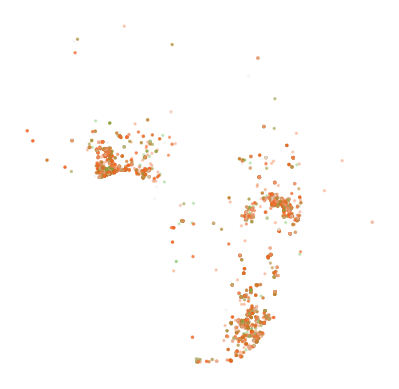

In [58]:
# urun_color = {'Urban':'#DE7942', 'Non-Urban':'#74863B', 'Unclassified':'#E4E5E6'} # print colors
urun_color = {'Urban':'#f26522', 'Non-Urban':'#5fbb46', 'Unclassified':'#e6e7e8'} # bright colors
star_ur['URUN_Color'] = star_ur['URUN'].map(urun_color)
# display( star_ur[['URUN', 'URUN_Color']])
# cmap_urun = sns.color_palette(['#DE7942', '#74863B', '#E4E5E6'])

print(uc.crs)
print(nuc.crs)

star_ur = star_ur.set_geometry('geometry')
print(star_ur.crs)

ax = star_ur.plot(c=star_ur['URUN_Color'], alpha=0.25, markersize=2)
ax.set_axis_off()

newpath = "data_gen/urbanrural/star_urbanrural".format(datenow)
if not os.path.exists(newpath):
    os.makedirs(newpath)

display(star_ur[['URUN', 'URUN_Color']])
star_ur.to_file(newpath)

# Reasons

## Reasons Data

In [36]:
# from 240127 Open-Ended Variable Categorization v2.ipynb
reasons  = pd.read_csv("20240204 Reasons - Joined to Respondents (Short).csv", index_col='index')

for i,c in enumerate(reasons.columns):
    print("'{}',".format(c))
    
## 240308 - Add Q in front of any numeric columns - necessary to work in Java / D3
nonid_cols = reasons.columns[~reasons.columns.isin(['SITE_CODE', '8 Identify City '])]
print(nonid_cols)

for i,c in enumerate(nonid_cols):
    reasons = reasons.rename(columns={c:('Q'+c)})

reasons

'SITE_CODE',
'8 Identify City ',
'203b',
'203b_theme',
'205c',
'205c_theme',
'207b',
'207b_theme',
'210b',
'210b_theme',
'215',
'215_theme',
'217',
'217_theme',
Index(['203b', '203b_theme', '205c', '205c_theme', '207b', '207b_theme',
       '210b', '210b_theme', '215', '215_theme', '217', '217_theme'],
      dtype='object')


,SITE_CODE,8 Identify City,Q203b,Q203b_theme,Q205c,Q205c_theme,Q207b,Q207b_theme,Q210b,Q210b_theme,Q215,Q215_theme,Q217,Q217_theme
index,,,,,,,,,,,,,,
276785,276785,Nairobi,Access to work,Work,-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer)
276788,276788,Nairobi,-3,(No Answer),-3,(No Answer),-3,(No Answer),-3,(No Answer),-3,(No Answer),-3,(No Answer)
276802,276802,Nairobi,-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer)
276814,276814,Nairobi,Family reasons (unification / escape),Kin,Access to work,Work,Access to work,Work,Education (for self or others),Education,-1,(No Answer),-1,(No Answer)
276822,276822,Nairobi,Access to work,Work,-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297661,297661,Johannesburg,-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer)
297663,297663,Johannesburg,-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer),-1,(No Answer)
297666,297666,Johannesburg,"Exploration, restart, or independence",Restart,Access to work,Work,Access to work,Work,Needed more space,Housing,-1,(No Answer),-1,(No Answer)


In [37]:
reason_cols = ['Q203b','Q205c','Q207b','Q210b','Q215','Q217']

reason_counts = reasons[reason_cols].apply(pd.Series.value_counts).fillna(0)
reason_counts

,Q203b,Q205c,Q207b,Q210b,Q215,Q217
Family reasons (unification / escape),0.0,0.0,0.0,0.0,3.0,0.0
-1,819.0,1355.0,1355.0,1553.0,1618.0,1618.0
-3,1.0,1.0,1.0,1.0,1.0,1.0
Access to education or training,5.0,1.0,1.0,0.0,0.0,2.0
Access to work,449.0,146.0,184.0,40.0,16.0,0.0
Access to work or economic opportunities,7.0,2.0,2.0,2.0,0.0,6.0
"Asylum, war, crime, or violence",4.0,2.0,1.0,0.0,0.0,0.0
Climate,1.0,0.0,0.0,0.0,0.0,1.0
Completion of education,1.0,6.0,0.0,0.0,0.0,0.0
Cost of rent (too high& somewhere else much cheaper),32.0,14.0,12.0,9.0,1.0,0.0


In [38]:
theme_cols = ['Q203b_theme', 'Q205c_theme', 'Q207b_theme', 'Q210b_theme', 'Q215_theme', 'Q217_theme']

reason_counts = reasons[theme_cols].apply(pd.Series.value_counts).fillna(0)
reason_counts['sum'] = reason_counts.sum(axis=1)
reason_counts

,Q203b_theme,Q205c_theme,Q207b_theme,Q210b_theme,Q215_theme,Q217_theme,sum
(No Answer),821.0,1360.0,1357.0,1555.0,1619.0,1619,8331.0
Education,90.0,27.0,19.0,8.0,2.0,2,148.0
Housing,66.0,32.0,21.0,16.0,2.0,2,139.0
Kin,176.0,55.0,48.0,14.0,4.0,1,298.0
Remain,0.0,0.0,0.0,0.0,0.0,4,4.0
Restart,8.0,9.0,6.0,1.0,0.0,2,26.0
Safety,19.0,7.0,3.0,2.0,0.0,1,32.0
Work,464.0,154.0,190.0,48.0,17.0,10,883.0


In [39]:
for i,c in enumerate(matrix_pivot_cols):
    print("'{}'".format(c))

'Q009_1'
'Q009_2'
'Q100_1'
'Q100_2'
'Q134_1'
'Q134_2'
'Q134_3'
'Q134_4'
'Q134_5'
'Q134_6'
'Q134_7'
'Q142_1'
'Q142_10'
'Q142_11'
'Q142_2'
'Q142_3'
'Q142_4'
'Q142_5'
'Q142_6'
'Q142_7'
'Q142_8'
'Q142_9'
'Q152_1'
'Q152_2'
'Q152_3'
'Q152_4'
'Q152_5'
'Q152_6'
'Q202_1'
'Q202_2'
'Q202_3'
'Q202_4'
'Q202_5'
'Q206_1'
'Q206_2'
'Q211_1'
'Q214_1'
'Q214_2'
'Q215_1'
'Q219_1'
'Q219_2'
'Q219_3'
'Q225_1'
'Q225_2'
'Q225_3'
'Q225_4'
'Q225_5'
'Q225_6'
'Q225_7'
'Q225_8'
'Q311_1'
'Q311_2'
'Q311_3'
'Q311_4'
'Q311_5'
'Q311_6'
'Q321_1'
'Q321_2'
'Q321_3'
'Q321_4'
'Q340_1'
'Q340_2'
'Q340_3'
'Q340_4'
'Q342_1'
'Q342_2'
'Q342_3'
'Q343_1'
'Q343_2'
'Q343_3'
'Q344_1'
'Q344_2'
'Q344_3'
'Q344_4'
'Q406_1'
'Q406_2'
'Q406_3'
'Q406_4'
'Q406_5'
'Q406_6'
'Q516_1'
'Q516_2'
'Q516_3'
'Q516_4'
'Q701_1'
'Q701_2'
'Q701_3'
'Q703_1'
'Q703_2'
'Q705_1'
'Q705_2'
'Q705_3'
'Q707_1'
'Q707_2'
'Q712_1'
'Q712_2'
'Q713_1'
'Q713_2'
'Q713_3'
'Q713_4'
'Q715_1'
'Q715_2'
'Q715_3'
'Q715_4'
'Q717_1'
'Q717_2'
'Q717_3'


In [40]:
# for reference on corresponding columns
reasons_tbl = \
{'location_type':['Q202', 'Q206', 'Q211', 'Q214'],
 'in':['Q203b', 'Q207b', 'Q212a', 'Q215'],
 'out':['Q205c', 'Q210b', 'Q213', 'Q217']
}

reasons_df = pd.DataFrame(reasons_tbl)
reasons_df['in_theme'] = reasons_df['in'] + '_theme'
reasons_df['out_theme'] = reasons_df['out'] + '_theme'
reasons_df

,location_type,in,out,in_theme,out_theme
0,Q202,Q203b,Q205c,Q203b_theme,Q205c_theme
1,Q206,Q207b,Q210b,Q207b_theme,Q210b_theme
2,Q211,Q212a,Q213,Q212a_theme,Q213_theme
3,Q214,Q215,Q217,Q215_theme,Q217_theme


In [41]:
loc_cols = ['Q202_1',
'Q202_2',
'Q202_3',
'Q202_4',
'Q202_5',
'Q206_1',
'Q206_2',
'Q211_1',
'Q214_1',
'Q214_2']

reason_cols = ['Q203b','Q205c','Q207b','Q210b','Q215','Q217']

reason_dict = {'Q203b':'Q202_in_rsn',
                  'Q205c':'Q202_out_rsn',
                  'Q207b':'Q206_in_rsn', 
                  'Q210b':'Q206_out_rsn', 
                  'Q215':'Q214_in_rsn', 
                  'Q217':'Q214_out_rsn'}

theme_cols = ['Q203b_theme', 'Q205c_theme', 'Q207b_theme', 'Q210b_theme', 'Q215_theme', 'Q217_theme']

theme_dict = {'Q203b_theme':'Q202_in_thm',
                  'Q205c_theme':'Q202_out_thm',
                  'Q207b_theme':'Q206_in_thm', 
                  'Q210b_theme':'Q206_out_thm', 
                  'Q215_theme':'Q214_in_thm', 
                  'Q217_theme':'Q214_out_thm'}

theme_newcols = list( pd.Series(theme_cols).replace(theme_dict) )
print(theme_newcols)

['Q202_in_thm', 'Q202_out_thm', 'Q206_in_thm', 'Q206_out_thm', 'Q214_in_thm', 'Q214_out_thm']


In [42]:
sortlist = loc_cols + theme_newcols
sortlist.sort()
print(sortlist)

['Q202_1', 'Q202_2', 'Q202_3', 'Q202_4', 'Q202_5', 'Q202_in_thm', 'Q202_out_thm', 'Q206_1', 'Q206_2', 'Q206_in_thm', 'Q206_out_thm', 'Q211_1', 'Q214_1', 'Q214_2', 'Q214_in_thm', 'Q214_out_thm']


In [43]:
reasons_merge = reasons[['SITE_CODE']+theme_cols].rename(columns=theme_dict).rename(columns={'SITE_CODE':'respID'})
print(theme_cols)

## ** MOVED TO FRONT **
## 240308 - Add Q in front of any numeric columns - necessary to work in Java / D3
# nonid_cols = reasons_merge.columns[~reasons_merge.columns.isin(['respID'])]
# print(nonid_cols)

# for i,c in enumerate(nonid_cols):
#     reasons_merge = reasons_merge.rename(columns={c:('Q'+c)})

display( reasons_merge )

['Q203b_theme', 'Q205c_theme', 'Q207b_theme', 'Q210b_theme', 'Q215_theme', 'Q217_theme']


,respID,Q202_in_thm,Q202_out_thm,Q206_in_thm,Q206_out_thm,Q214_in_thm,Q214_out_thm
index,,,,,,,
276785,276785,Work,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
276788,276788,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
276802,276802,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
276814,276814,Kin,Work,Work,Education,(No Answer),(No Answer)
276822,276822,Work,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
...,...,...,...,...,...,...,...
297661,297661,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
297663,297663,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
297666,297666,Restart,Work,Work,Housing,(No Answer),(No Answer)


### A. Respondent-Location Matrix

In [44]:
print(matrix_ur.shape)
matrix_reasons = matrix_ur.copy()

print(theme_newcols)
print(sortlist)

for i,c in enumerate(theme_newcols):
    merge = reasons_merge[['respID', c]]
    matrix_reasons = pd.merge(matrix_reasons, merge, on='respID', how='left')
    
matrix_reasons = matrix_reasons.sort_index(axis=1) # sort columns
print(matrix_reasons['respID'].is_unique)
matrix_reasons['ID'] = matrix_reasons['respID']
matrix_reasons = matrix_reasons.set_index('ID')

print(matrix_reasons.shape)
display(matrix_reasons)
# display(matrix_reasons[sortlist])
matrix_reasons.to_csv('{} Trajectory as Matrix - Reasons.csv'.format(datenow))

(1644, 1073)
['Q202_in_thm', 'Q202_out_thm', 'Q206_in_thm', 'Q206_out_thm', 'Q214_in_thm', 'Q214_out_thm']
['Q202_1', 'Q202_2', 'Q202_3', 'Q202_4', 'Q202_5', 'Q202_in_thm', 'Q202_out_thm', 'Q206_1', 'Q206_2', 'Q206_in_thm', 'Q206_out_thm', 'Q211_1', 'Q214_1', 'Q214_2', 'Q214_in_thm', 'Q214_out_thm']
True
(1644, 1079)


,Q009_1,Q009_1_A,Q009_1_B,Q009_1_C,Q009_1_URUN,Q009_1_azim,Q009_1_dist,Q009_1_lat,Q009_1_lon,Q009_1_pt,...,Q717_3_A,Q717_3_B,Q717_3_C,Q717_3_URUN,Q717_3_azim,Q717_3_dist,Q717_3_lat,Q717_3_lon,Q717_3_pt,respID
ID,,,,,,,,,,,,,,,,,,,,,
276785,"(Kawangware, Nairobi, Kenya)",Kawangware,Nairobi,Kenya,Urban,3.141593,0.01,-1.278463,36.751643,POINT (36.75164 -1.27846),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,276785
276788,"(Kawangware, nan, nan)",Kawangware,NaN,NaN,Urban,3.141593,0.01,-1.278463,36.751643,POINT (36.75164 -1.27846),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,276788
276802,"(Kawangware, Nairobi, Kenya)",Kawangware,Nairobi,Kenya,Urban,3.141593,0.01,-1.278463,36.751643,POINT (36.75164 -1.27846),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,276802
276814,"(Kayole, Nairobi, Kenya)",Kayole,Nairobi,Kenya,Urban,3.141593,0.01,-1.265984,36.916945,POINT (36.91695 -1.26598),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,276814
276822,"(Kayole, Nairobi, Kenya)",Kayole,Nairobi,Kenya,Urban,3.141593,0.01,-1.265984,36.916945,POINT (36.91695 -1.26598),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,276822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297661,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,Urban,3.141593,0.01,-26.182222,28.053333,POINT (28.05333 -26.18222),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,297661
297663,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,Urban,3.141593,0.01,-26.182222,28.053333,POINT (28.05333 -26.18222),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,297663
297666,"(Berea, Johannesburg, South Africa)",Berea,Johannesburg,South Africa,Urban,3.141593,0.01,-26.182222,28.053333,POINT (28.05333 -26.18222),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,297666


### B. Unstacked Trajectories

In [45]:

display(reasons_df) # table to reference for corresponding columns
display(reasons_merge) # table we will merge

print( reasons_df.loc[reasons_df.in_theme.eq('Q203b_theme'), 'location_type'].item() ) # one method to return corresponding column

print("\nLOCATIONS INCLUDED:")
for i,c in enumerate(reasons_df['location_type']):
    print('{}\t{}'.format(i,c))

,location_type,in,out,in_theme,out_theme
0,Q202,Q203b,Q205c,Q203b_theme,Q205c_theme
1,Q206,Q207b,Q210b,Q207b_theme,Q210b_theme
2,Q211,Q212a,Q213,Q212a_theme,Q213_theme
3,Q214,Q215,Q217,Q215_theme,Q217_theme


,respID,Q202_in_thm,Q202_out_thm,Q206_in_thm,Q206_out_thm,Q214_in_thm,Q214_out_thm
index,,,,,,,
276785,276785,Work,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
276788,276788,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
276802,276802,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
276814,276814,Kin,Work,Work,Education,(No Answer),(No Answer)
276822,276822,Work,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
...,...,...,...,...,...,...,...
297661,297661,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
297663,297663,(No Answer),(No Answer),(No Answer),(No Answer),(No Answer),(No Answer)
297666,297666,Restart,Work,Work,Housing,(No Answer),(No Answer)


Q202

LOCATIONS INCLUDED:
0	Q202
1	Q206
2	Q211
3	Q214


In [46]:
star_reasons = star_ur.copy() # We will add reasons to the previous urban rural star chart data

## Two tables will be used:
df = star_ur.copy() # (1) a table with the structure for start charts, and...
dfm = reasons_merge.copy() # (2) the earlier table we created to merge reasons.

df['in_thm'] = np.nan # new incoming reason column
df['out_thm'] = np.nan # new outgoing reason column

for i, rid in enumerate(df['ID']): # For each respondent ID...
    for j,c in enumerate([202, 206, 214]): # and for each reason columns indicated here ...
        ## We will loop through corresponding row / location within the trajectory dataset.
        
        in_theme_col = 'Q' + str(c) + '_in_thm' # We will reconstruct the name of the incoming reason column..         
        ## to fill in the value for the new 'in_thm' column in the trajectory dataset
        ## after locating the value in the reasons table we created for merging.
        df.loc[(df['ID'].eq(rid) & df['location_type'].eq(c)), 'in_thm'] = dfm.loc[dfm['respID'].eq(rid), in_theme_col].item()
        
        out_theme_col = 'Q' + str(c) + '_out_thm' # Similarly we will reconstruct the name of the outgoing reason column..
        ## to fill in the value for the new 'in_thm' column in the trajectory dataset
        ## after locating the value in the reasons table we created for merging.
        df.loc[(df['ID'].eq(rid) & df['location_type'].eq(c)), 'out_thm'] = dfm.loc[dfm['respID'].eq(rid), out_theme_col].item()
        

star_reasons = df.copy() # replace the placeholder / back-up

display( star_reasons )
print("\nINCOMING REASONS:")
print( star_reasons['in_thm'].value_counts() )
print("\nINCOMING REASONS:")
print( star_reasons['out_thm'].value_counts() )

,ID,ID_ordered,location,dist,azimuth,lon,lat,location_type,max_dist_moves,grouping,...,location_unique,location_col,UR_ind,URUN,lat_UR,lon_UR,geometry,URUN_Color,in_thm,out_thm
0,276785,276785.00,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,276785-100-1,Q100_1,Kenya_ Kisumu_Kisumu,Urban,-0.102911,34.754176,POINT (34.75418 -0.10291),#f26522,NaN,NaN
1,276785,276785.01,"('Manyatta', 'Kisumu', 'Kenya')",291.141195,2.607973,34.481394,0.333309,202,291.141195,moves200,...,276785-202-1,Q202_1,Kenya_ Kisumu_Manyatta,Urban,0.333309,34.481394,POINT (34.48139 0.33331),#f26522,Work,(No Answer)
2,276785,276785.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,291.141195,moves200,...,276785-202-2,Q202_2,Kenya_ Nairobi_Kawangware,Urban,-1.278463,36.751643,POINT (36.75164 -1.27846),#f26522,Work,(No Answer)
3,276785,276785.06,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,9,291.141195,moves200,...,276785-009-1,Q009_1,Kenya_ Nairobi_Kawangware,Urban,-1.278463,36.751643,POINT (36.75164 -1.27846),#f26522,NaN,NaN
4,276788,276788.00,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,276788-100-1,Q100_1,Kenya_ Oyugis_Oyugis,Urban,-0.509908,34.734576,POINT (34.73458 -0.50991),#f26522,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,297654-344-1,Q344_1,South Africa_ Randburg_Cosmo City,Urban,-26.021935,27.930757,POINT (27.93076 -26.02193),#f26522,NaN,NaN
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,297655-344-1,Q344_1,South Africa_ Maputo_Matola,Urban,-25.867549,29.143194,POINT (29.14319 -25.86755),#f26522,NaN,NaN
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,297656-344-1,Q344_1,South Africa_ Johannesburg_Soweto,Urban,-26.222778,27.890000,POINT (27.89000 -26.22278),#f26522,NaN,NaN
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,297660-344-1,Q344_1,South Africa_ Johannesburg_Houghton,Urban,-34.022894,18.733376,POINT (18.73338 -34.02289),#f26522,NaN,NaN



INCOMING REASONS:
in_thm
Work           725
Kin            244
Education      110
Housing         99
Safety          22
Restart         14
(No Answer)      1
Name: count, dtype: int64

INCOMING REASONS:
out_thm
(No Answer)    813
Work           217
Kin             70
Housing         49
Education       37
Restart         12
Safety           9
Remain           4
Name: count, dtype: int64


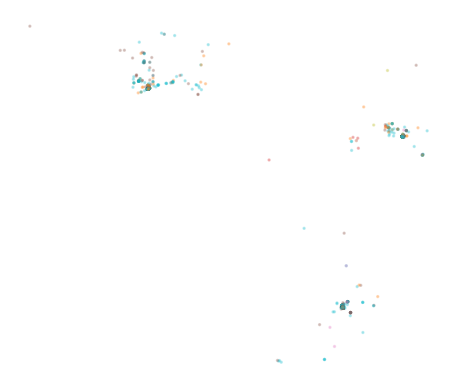

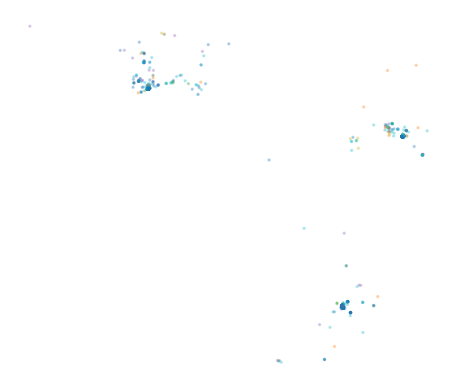

In [47]:
## top plotted map to test the in_thm column
ax1 = star_reasons.plot(column=star_reasons['in_thm'], alpha=0.25, markersize=2)
ax1.set_axis_off()

## top plotted map to test the out_thm column
ax2 = star_reasons.plot(column=star_reasons['out_thm'], alpha=0.25, markersize=2)
ax2.set_axis_off()

# ## export a shapefile for today
# newpath = "{}_UrbanRural_Reasons_Points".format(datenow)
# if not os.path.exists(newpath):
#     os.makedirs(newpath)
# star_reasons.to_file(newpath)

### B.1 Reasons per Location

In [48]:
star_reasons

,ID,ID_ordered,location,dist,azimuth,lon,lat,location_type,max_dist_moves,grouping,...,location_unique,location_col,UR_ind,URUN,lat_UR,lon_UR,geometry,URUN_Color,in_thm,out_thm
0,276785,276785.00,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,276785-100-1,Q100_1,Kenya_ Kisumu_Kisumu,Urban,-0.102911,34.754176,POINT (34.75418 -0.10291),#f26522,NaN,NaN
1,276785,276785.01,"('Manyatta', 'Kisumu', 'Kenya')",291.141195,2.607973,34.481394,0.333309,202,291.141195,moves200,...,276785-202-1,Q202_1,Kenya_ Kisumu_Manyatta,Urban,0.333309,34.481394,POINT (34.48139 0.33331),#f26522,Work,(No Answer)
2,276785,276785.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,291.141195,moves200,...,276785-202-2,Q202_2,Kenya_ Nairobi_Kawangware,Urban,-1.278463,36.751643,POINT (36.75164 -1.27846),#f26522,Work,(No Answer)
3,276785,276785.06,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,9,291.141195,moves200,...,276785-009-1,Q009_1,Kenya_ Nairobi_Kawangware,Urban,-1.278463,36.751643,POINT (36.75164 -1.27846),#f26522,NaN,NaN
4,276788,276788.00,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,276788-100-1,Q100_1,Kenya_ Oyugis_Oyugis,Urban,-0.509908,34.734576,POINT (34.73458 -0.50991),#f26522,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,297654-344-1,Q344_1,South Africa_ Randburg_Cosmo City,Urban,-26.021935,27.930757,POINT (27.93076 -26.02193),#f26522,NaN,NaN
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,297655-344-1,Q344_1,South Africa_ Maputo_Matola,Urban,-25.867549,29.143194,POINT (29.14319 -25.86755),#f26522,NaN,NaN
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,297656-344-1,Q344_1,South Africa_ Johannesburg_Soweto,Urban,-26.222778,27.890000,POINT (27.89000 -26.22278),#f26522,NaN,NaN
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,297660-344-1,Q344_1,South Africa_ Johannesburg_Houghton,Urban,-34.022894,18.733376,POINT (18.73338 -34.02289),#f26522,NaN,NaN


In [49]:
in_reasons = star_reasons[['ID', 'location', 'in_thm', 'geometry', 'lat', 'lon']].groupby(['location', 'geometry', 'lat', 'lon', 'in_thm']).count().reset_index().rename(columns={'ID':'move_count'})
ctcol = 'move_count'
col = 'location'
print( "Responses included: {}".format(in_reasons[ctcol].sum()) )
display(in_reasons)

# 1. Top Response
print( "\nTOP IN REASONS")

top = in_reasons.reset_index(drop=True).sort_values(ctcol, ascending=False) # sort so the biggest go to the top or first row
dup = top[top[col].duplicated(keep=False)].sort_values(col) # see duplicates
top = top.drop_duplicates(subset=col, keep='first').set_index([col, 'geometry']) # keep only the top reason
print( "Responses included in only the top reasons: {}".format(top[ctcol].sum()) )
display(dup)
display(top)

# 2. Pivoted Table for Each Category
pivoted = in_reasons.pivot(index=[col, 'geometry'], columns='in_thm', values = 'move_count').fillna(0)

for i,c in enumerate(pivoted.columns):
    in_c = 'In_{}'.format(c.strip("()").replace(" ", "_"))
    pivoted = pivoted.rename(columns={c:in_c})

print( "\nIN REASON COUNTS PER CITY")
display(pivoted)

# 3. Merged Urban-Rural Data per City
in_reasons = pd.merge(top, pivoted, how='left', left_index=True, right_index=True)
print( "Unique locations index: {}".format(in_reasons.index.is_unique) )
print( "\nCITY x IN REASONS MATRIX" )
display(in_reasons)

dup.to_csv('{} City x In Reasons Matrix - Duplicates.csv'.format(datenow))
in_reasons.to_csv('{} City x In Reasons Matrix.csv'.format(datenow))

Responses included: 1181


,location,geometry,lat,lon,in_thm,move_count
0,"('Abeka', 'Accra', 'Ghana')",POINT (-0.24183 5.59998),5.599984,-0.241833,Work,2
1,"('Abia', 'Lagos', 'Nigeria')",POINT (7.51531 5.45410),5.454095,7.515307,Work,1
2,"('Ablekuma', 'Accra', 'Ghana')",POINT (-0.31350 5.62793),5.627934,-0.313500,Work,1
3,"('Aboabo', 'Kumasi', 'Ghana')",POINT (-0.23505 6.11857),6.118574,-0.235045,Education,1
4,"('Abuja', 'Abuja', 'Ghana')",POINT (-1.28528 5.12137),5.121369,-1.285284,Work,1
...,...,...,...,...,...,...
502,"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),-26.183889,28.064167,Work,3
503,"('Yobe', 'Nasarawa', 'Nigeria')",POINT (11.50659 12.12332),12.123324,11.506594,Education,1
504,"('Youville', 'Johannesburg', 'South Africa')",POINT (28.04972 -26.20500),-26.205000,28.049722,Kin,1
505,"('Youville', 'Johannesburg', 'South Africa')",POINT (28.04972 -26.20500),-26.205000,28.049722,Work,1



TOP IN REASONS
Responses included in only the top reasons: 874


,location,geometry,lat,lon,in_thm,move_count
11,"('Accra', 'Accra', 'Ghana')",POINT (-0.20124 5.55711),5.557110,-0.201238,Work,2
10,"('Accra', 'Accra', 'Ghana')",POINT (-0.20124 5.55711),5.557110,-0.201238,Kin,1
13,"('Achimota', 'Accra', 'Ghana')",POINT (-0.22768 5.62420),5.624202,-0.227681,Work,1
12,"('Achimota', 'Accra', 'Ghana')",POINT (-0.22768 5.62420),5.624202,-0.227681,Housing,1
16,"('Adabraka', 'Accra', 'Ghana')",POINT (-0.20907 5.56643),5.566430,-0.209072,Work,2
...,...,...,...,...,...,...
501,"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),-26.183889,28.064167,Kin,2
502,"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),-26.183889,28.064167,Work,3
500,"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),-26.183889,28.064167,Housing,1
505,"('Youville', 'Johannesburg', 'South Africa')",POINT (28.04972 -26.20500),-26.205000,28.049722,Work,1


,,lat,lon,in_thm,move_count
location,geometry,,,,
"('Madina', 'Accra', 'Ghana')",POINT (-0.16771 5.68650),5.686496,-0.167705,Work,66
"('Old Fadama', 'Accra', 'Ghana')",POINT (-0.22252 5.54887),5.548867,-0.222522,Work,64
"('Berea', 'Johannesburg', 'South Africa')",POINT (28.05333 -26.18222),-26.182222,28.053333,Work,53
"('Ongata Rongai', 'Nairobi', 'Kenya')",POINT (36.75201 -1.39597),-1.395968,36.752011,Work,45
"('Kayole', 'Nairobi', 'Kenya')",POINT (36.91695 -1.26598),-1.265984,36.916945,Work,44
...,...,...,...,...,...
"('Kadjebi', 'Hohoe', 'Ghana')",POINT (0.47610 7.52593),7.525931,0.476103,Housing,1
"('Kadjebi', 'Ho', 'Ghana')",POINT (0.47610 7.52593),7.525931,0.476103,Work,1
"('Kabiria', 'Nairobi', 'Kenya')",POINT (36.72567 -1.29125),-1.291248,36.725674,Work,1



IN REASON COUNTS PER CITY


,in_thm,In_No_Answer,In_Education,In_Housing,In_Kin,In_Restart,In_Safety,In_Work
location,geometry,,,,,,,
"('Abeka', 'Accra', 'Ghana')",POINT (-0.24183 5.59998),0.0,0.0,0.0,0.0,0.0,0.0,2.0
"('Abia', 'Lagos', 'Nigeria')",POINT (7.51531 5.45410),0.0,0.0,0.0,0.0,0.0,0.0,1.0
"('Ablekuma', 'Accra', 'Ghana')",POINT (-0.31350 5.62793),0.0,0.0,0.0,0.0,0.0,0.0,1.0
"('Aboabo', 'Kumasi', 'Ghana')",POINT (-0.23505 6.11857),0.0,1.0,0.0,0.0,0.0,0.0,0.0
"('Abuja', 'Abuja', 'Ghana')",POINT (-1.28528 5.12137),0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
"('Yendi', 'Tamale', 'Ghana')",POINT (-0.00351 9.44665),0.0,0.0,0.0,1.0,0.0,0.0,1.0
"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),0.0,0.0,1.0,2.0,0.0,0.0,3.0
"('Yobe', 'Nasarawa', 'Nigeria')",POINT (11.50659 12.12332),0.0,1.0,0.0,0.0,0.0,0.0,0.0


Unique locations index: True

CITY x IN REASONS MATRIX


,,lat,lon,in_thm,move_count,In_No_Answer,In_Education,In_Housing,In_Kin,In_Restart,In_Safety,In_Work
location,geometry,,,,,,,,,,,
"('Madina', 'Accra', 'Ghana')",POINT (-0.16771 5.68650),5.686496,-0.167705,Work,66,0.0,5.0,0.0,21.0,2.0,1.0,66.0
"('Old Fadama', 'Accra', 'Ghana')",POINT (-0.22252 5.54887),5.548867,-0.222522,Work,64,0.0,0.0,0.0,4.0,0.0,0.0,64.0
"('Berea', 'Johannesburg', 'South Africa')",POINT (28.05333 -26.18222),-26.182222,28.053333,Work,53,0.0,6.0,10.0,18.0,0.0,2.0,53.0
"('Ongata Rongai', 'Nairobi', 'Kenya')",POINT (36.75201 -1.39597),-1.395968,36.752011,Work,45,0.0,7.0,7.0,13.0,0.0,3.0,45.0
"('Kayole', 'Nairobi', 'Kenya')",POINT (36.91695 -1.26598),-1.265984,36.916945,Work,44,0.0,4.0,10.0,11.0,2.0,5.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"('Kadjebi', 'Hohoe', 'Ghana')",POINT (0.47610 7.52593),7.525931,0.476103,Housing,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"('Kadjebi', 'Ho', 'Ghana')",POINT (0.47610 7.52593),7.525931,0.476103,Work,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"('Kabiria', 'Nairobi', 'Kenya')",POINT (36.72567 -1.29125),-1.291248,36.725674,Work,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [50]:
out_reasons = star_reasons[['ID', 'location', 'out_thm', 'geometry']].groupby(['location', 'geometry', 'out_thm']).count().reset_index().rename(columns={'ID':'move_count'})
ctcol = 'move_count'
col = 'location'
print( "Responses included: {}".format(out_reasons[ctcol].sum()) )
display(out_reasons)

# 1. Top Response
print( "\nTOP IN REASONS")
top = out_reasons.reset_index(drop=True).sort_values(ctcol, ascending=False)
dup = top[top[col].duplicated(keep=False)].sort_values(col) # see duplicates
top = top.drop_duplicates(subset=col, keep='first').set_index([col, 'geometry'])
print( "Responses included in only the top reasons: {}".format(top[ctcol].sum()) )
display(dup)
display(top)

# 2. Pivoted Table for Each Category
pivoted = out_reasons.pivot(index=[col, 'geometry'], columns='out_thm', values = 'move_count').fillna(0)

for i,c in enumerate(pivoted.columns):
    out_c = 'Out_{}'.format(c.strip("()").replace(" ", "_"))
    pivoted = pivoted.rename(columns={c:out_c})

print( "\nOUT REASON COUNTS PER CITY")
display(pivoted)

# 3. Merged Urban-Rural Data per City
out_reasons = pd.merge(top, pivoted, how='left', left_index=True, right_index=True)
print( "Unique locations index: {}".format(out_reasons.index.is_unique) )
print( "\nCITY x OUT REASONS MATRIX" )
display(out_reasons)

dup.to_csv('{} City x Out Reasons Matrix - Duplicates.csv'.format(datenow))
out_reasons.to_csv('{} City x Out Reasons Matrix.csv'.format(datenow))

Responses included: 1177


,location,geometry,out_thm,move_count
0,"('Abeka', 'Accra', 'Ghana')",POINT (-0.24183 5.59998),(No Answer),1
1,"('Abeka', 'Accra', 'Ghana')",POINT (-0.24183 5.59998),Housing,1
2,"('Abia', 'Lagos', 'Nigeria')",POINT (7.51531 5.45410),Work,1
3,"('Ablekuma', 'Accra', 'Ghana')",POINT (-0.31350 5.62793),(No Answer),1
4,"('Aboabo', 'Kumasi', 'Ghana')",POINT (-0.23505 6.11857),Work,1
...,...,...,...,...
487,"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),Kin,1
488,"('Yobe', 'Nasarawa', 'Nigeria')",POINT (11.50659 12.12332),(No Answer),1
489,"('Youville', 'Johannesburg', 'South Africa')",POINT (28.04972 -26.20500),Kin,1
490,"('Youville', 'Johannesburg', 'South Africa')",POINT (28.04972 -26.20500),Work,1



TOP IN REASONS
Responses included in only the top reasons: 1064


,location,geometry,out_thm,move_count
1,"('Abeka', 'Accra', 'Ghana')",POINT (-0.24183 5.59998),Housing,1
0,"('Abeka', 'Accra', 'Ghana')",POINT (-0.24183 5.59998),(No Answer),1
11,"('Accra', 'Accra', 'Ghana')",POINT (-0.20124 5.55711),(No Answer),2
12,"('Accra', 'Accra', 'Ghana')",POINT (-0.20124 5.55711),Work,1
14,"('Adabraka', 'Accra', 'Ghana')",POINT (-0.20907 5.56643),(No Answer),3
...,...,...,...,...
485,"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),(No Answer),4
486,"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),Housing,1
487,"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),Kin,1
490,"('Youville', 'Johannesburg', 'South Africa')",POINT (28.04972 -26.20500),Work,1


,,out_thm,move_count
location,geometry,,
"('Madina', 'Accra', 'Ghana')",POINT (-0.16771 5.68650),(No Answer),88
"('Berea', 'Johannesburg', 'South Africa')",POINT (28.05333 -26.18222),(No Answer),87
"('Kawangware', 'Nairobi', 'Kenya')",POINT (36.75164 -1.27846),(No Answer),75
"('Kayole', 'Nairobi', 'Kenya')",POINT (36.91695 -1.26598),(No Answer),73
"('Ongata Rongai', 'Nairobi', 'Kenya')",POINT (36.75201 -1.39597),(No Answer),71
...,...,...,...
"('Juapong', 'Ho', 'Ghana')",POINT (0.13525 6.25450),Work,1
"('Jomvu', 'Mombasa', 'Kenya')",POINT (39.60807 -3.98618),Kin,1
"('Jabi', 'Abuja', 'Nigeria')",POINT (7.42101 9.06462),Work,1



OUT REASON COUNTS PER CITY


,out_thm,Out_No_Answer,Out_Education,Out_Housing,Out_Kin,Out_Remain,Out_Restart,Out_Safety,Out_Work
location,geometry,,,,,,,,
"('Abeka', 'Accra', 'Ghana')",POINT (-0.24183 5.59998),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"('Abia', 'Lagos', 'Nigeria')",POINT (7.51531 5.45410),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"('Ablekuma', 'Accra', 'Ghana')",POINT (-0.31350 5.62793),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"('Aboabo', 'Kumasi', 'Ghana')",POINT (-0.23505 6.11857),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"('Abuja', 'Abuja', 'Ghana')",POINT (-1.28528 5.12137),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
"('Yendi', 'Tamale', 'Ghana')",POINT (-0.00351 9.44665),1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
"('Yobe', 'Nasarawa', 'Nigeria')",POINT (11.50659 12.12332),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Unique locations index: True

CITY x OUT REASONS MATRIX


,,out_thm,move_count,Out_No_Answer,Out_Education,Out_Housing,Out_Kin,Out_Remain,Out_Restart,Out_Safety,Out_Work
location,geometry,,,,,,,,,,
"('Madina', 'Accra', 'Ghana')",POINT (-0.16771 5.68650),(No Answer),88,88.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
"('Berea', 'Johannesburg', 'South Africa')",POINT (28.05333 -26.18222),(No Answer),87,87.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
"('Kawangware', 'Nairobi', 'Kenya')",POINT (36.75164 -1.27846),(No Answer),75,75.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
"('Kayole', 'Nairobi', 'Kenya')",POINT (36.91695 -1.26598),(No Answer),73,73.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
"('Ongata Rongai', 'Nairobi', 'Kenya')",POINT (36.75201 -1.39597),(No Answer),71,71.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
"('Juapong', 'Ho', 'Ghana')",POINT (0.13525 6.25450),Work,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"('Jomvu', 'Mombasa', 'Kenya')",POINT (39.60807 -3.98618),Kin,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"('Jabi', 'Abuja', 'Nigeria')",POINT (7.42101 9.06462),Work,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,location,geometry,lat,lon,in_thm,move_count_in,In_No_Answer,In_Education,In_Housing,In_Kin,...,out_thm,move_count_out,Out_No_Answer,Out_Education,Out_Housing,Out_Kin,Out_Remain,Out_Restart,Out_Safety,Out_Work
0,"('Abeka', 'Accra', 'Ghana')",POINT (-0.24183 5.59998),5.599984,-0.241833,Work,2,0.0,0.0,0.0,0.0,...,(No Answer),1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"('Abia', 'Lagos', 'Nigeria')",POINT (7.51531 5.45410),5.454095,7.515307,Work,1,0.0,0.0,0.0,0.0,...,Work,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,"('Ablekuma', 'Accra', 'Ghana')",POINT (-0.31350 5.62793),5.627934,-0.313500,Work,1,0.0,0.0,0.0,0.0,...,(No Answer),1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"('Aboabo', 'Kumasi', 'Ghana')",POINT (-0.23505 6.11857),6.118574,-0.235045,Education,1,0.0,1.0,0.0,0.0,...,Work,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,"('Abuja', 'Abuja', 'Ghana')",POINT (-1.28528 5.12137),5.121369,-1.285284,Work,1,0.0,0.0,0.0,0.0,...,Work,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,"('Yendi', 'Tamale', 'Ghana')",POINT (-0.00351 9.44665),9.446648,-0.003507,Kin,1,0.0,0.0,0.0,1.0,...,Work,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
394,"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),-26.183889,28.064167,Work,3,0.0,0.0,1.0,2.0,...,(No Answer),4.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
395,"('Yobe', 'Nasarawa', 'Nigeria')",POINT (11.50659 12.12332),12.123324,11.506594,Education,1,0.0,1.0,0.0,0.0,...,(No Answer),1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,"('Youville', 'Johannesburg', 'South Africa')",POINT (28.04972 -26.20500),-26.205000,28.049722,Kin,1,0.0,0.0,0.0,1.0,...,Work,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


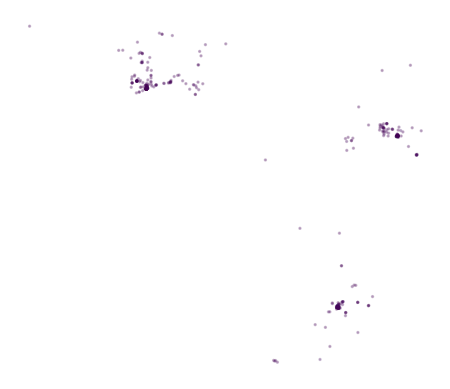

In [51]:
in_out_reasons = pd.merge(in_reasons, out_reasons, how='outer', left_index=True, right_index=True, suffixes=['_in', '_out'])
in_out_reasons = in_out_reasons.reset_index().set_geometry('geometry')

display(in_out_reasons)

ax1 = in_out_reasons.plot(column=in_out_reasons['In_Work'], alpha=0.25, markersize=2)
ax1.set_axis_off()

newpath = "{}_Locations_byReasons".format(datenow) # define a folder...
if not os.path.exists(newpath): # ...if the folder doesn't exist
    os.makedirs(newpath) # ... make the new folder

in_out_reasons.to_file(newpath)

### B.2 Reason-Locations (Reasons x Locations)

In [52]:
in_locs = star_reasons[['ID', 'location', 'in_thm',  'geometry']].groupby(['location', 'geometry', 'in_thm']).count().reset_index().rename(columns={'ID':'move_count'})
in_locs

,location,geometry,in_thm,move_count
0,"('Abeka', 'Accra', 'Ghana')",POINT (-0.24183 5.59998),Work,2
1,"('Abia', 'Lagos', 'Nigeria')",POINT (7.51531 5.45410),Work,1
2,"('Ablekuma', 'Accra', 'Ghana')",POINT (-0.31350 5.62793),Work,1
3,"('Aboabo', 'Kumasi', 'Ghana')",POINT (-0.23505 6.11857),Education,1
4,"('Abuja', 'Abuja', 'Ghana')",POINT (-1.28528 5.12137),Work,1
...,...,...,...,...
502,"('Yeoville', 'Johannesburg', 'South Africa')",POINT (28.06417 -26.18389),Work,3
503,"('Yobe', 'Nasarawa', 'Nigeria')",POINT (11.50659 12.12332),Education,1
504,"('Youville', 'Johannesburg', 'South Africa')",POINT (28.04972 -26.20500),Kin,1
505,"('Youville', 'Johannesburg', 'South Africa')",POINT (28.04972 -26.20500),Work,1


# X. Rejoin to O-D and Most Recent Migrations

Transfer of 240229 D3 Map Addition Table Joins

In [3]:
env = "C:/Users/willy/python/mobilities-narratives"

In [4]:
fol = "data_gen/trajectories"

# Most Recent Migrations
fil = "level1_migrations.csv"
migr1 = pd.read_csv( os.path.join(env, fol, fil), index_col=0)
display( migr1 )

# O-D migrations
fil = "origin_migrations.csv"
migr0 = pd.read_csv( os.path.join(env, fol, fil), index_col=0)
display( migr0 )

fil = "star_all_distances.csv"
star = pd.read_csv( os.path.join(env, fol, fil), index_col=0)
display( star )

,city_8,location,num_moves,dist,azimuth,lat,lon,location_pair,level,location_pair_id,locations,country,loc2,loc1
0,Nairobi,"('Machakos', 'Machakos', 'Kenya')",11,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Machakos', 'Machakos', 'Kenya'))",1,0,Nairobi,Kenya,Machakos,Machakos
1,Nairobi,"('Machakos', 'Machakos', 'Kenya')",11,71.429086,-0.000671,37.395270,-1.279005,"('Nairobi', ('Machakos', 'Machakos', 'Kenya'))",1,0,"('Machakos', 'Machakos', 'Kenya')",Kenya,Machakos,Machakos
2,Nairobi,"('Kisumu', 'Kisumu', 'Kenya')",9,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Kisumu', 'Kisumu', 'Kenya'))",1,1,Nairobi,Kenya,Kisumu,Kisumu
3,Nairobi,"('Kisumu', 'Kisumu', 'Kenya')",9,245.805142,2.688263,34.754176,-0.102911,"('Nairobi', ('Kisumu', 'Kisumu', 'Kenya'))",1,1,"('Kisumu', 'Kisumu', 'Kenya')",Kenya,Kisumu,Kisumu
4,Nairobi,"('Kisii', 'Kisii', 'Kenya')",7,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Kisii', 'Kisii', 'Kenya'))",1,2,Nairobi,Kenya,Kisii,Kisii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,Accra,"('nan', 'Anambra', 'Nigeria')",1,789.636769,0.074686,6.953184,6.218314,"('Accra', ('nan', 'Anambra', 'Nigeria'))",1,407,"('nan', 'Anambra', 'Nigeria')",Nigeria,Anambra,NaN
816,Accra,"('nan', 'Cotonou', 'Benin')",1,0.010000,0.000000,-0.187971,5.591177,"('Accra', ('nan', 'Cotonou', 'Benin'))",1,408,Accra,Benin,Cotonou,NaN
817,Accra,"('nan', 'Cotonou', 'Benin')",1,296.568837,0.258419,2.425251,6.367695,"('Accra', ('nan', 'Cotonou', 'Benin'))",1,408,"('nan', 'Cotonou', 'Benin')",Benin,Cotonou,NaN
818,Accra,"('nan', 'Dadieso', 'Ghana')",1,0.010000,0.000000,-0.187971,5.591177,"('Accra', ('nan', 'Dadieso', 'Ghana'))",1,409,Accra,Ghana,Dadieso,NaN


,city_8,location,num_moves,dist,azimuth,lat,lon,location_pair,location_pair_id,locations,country,loc2,loc1
0,Nairobi,"('Kisii', 'Kisii', 'Kenya')",15,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Kisii', 'Kisii', 'Kenya'))",0,Nairobi,Kenya,Kisii,Kisii
1,Nairobi,"('Kisii', 'Kisii', 'Kenya')",15,226.955417,2.922134,34.753986,-0.738943,"('Nairobi', ('Kisii', 'Kisii', 'Kenya'))",0,"('Kisii', 'Kisii', 'Kenya')",Kenya,Kisii,Kisii
2,Nairobi,"('Kisumu', 'Kisumu', 'Kenya')",13,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Kisumu', 'Kisumu', 'Kenya'))",1,Nairobi,Kenya,Kisumu,Kisumu
3,Nairobi,"('Kisumu', 'Kisumu', 'Kenya')",13,245.805142,2.688263,34.754176,-0.102911,"('Nairobi', ('Kisumu', 'Kisumu', 'Kenya'))",1,"('Kisumu', 'Kisumu', 'Kenya')",Kenya,Kisumu,Kisumu
4,Nairobi,"('Machakos', 'Machakos', 'Kenya')",10,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Machakos', 'Machakos', 'Kenya'))",2,Nairobi,Kenya,Machakos,Machakos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,Accra,"('nan', 'Leo', 'Burkina Faso')",1,648.430424,1.910416,-2.117445,11.181410,"('Accra', ('nan', 'Leo', 'Burkina Faso'))",343,"('nan', 'Leo', 'Burkina Faso')",Burkina Faso,Leo,NaN
688,Accra,"('nan', 'Orlu', 'Nigeria')",1,0.010000,0.000000,-0.187971,5.591177,"('Accra', ('nan', 'Orlu', 'Nigeria'))",344,Accra,Nigeria,Orlu,NaN
689,Accra,"('nan', 'Orlu', 'Nigeria')",1,797.262669,0.018260,7.040932,5.817910,"('Accra', ('nan', 'Orlu', 'Nigeria'))",344,"('nan', 'Orlu', 'Nigeria')",Nigeria,Orlu,NaN
690,Accra,"('nan', 'Porto-Novo', 'Benin')",1,0.010000,0.000000,-0.187971,5.591177,"('Accra', ('nan', 'Porto-Novo', 'Benin'))",345,Accra,Benin,Porto-Novo,NaN


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
0,276785,276785.00,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
1,276785,276785.01,"('Manyatta', 'Kisumu', 'Kenya')",291.141195,2.607973,34.481394,0.333309,202,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
2,276785,276785.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
3,276785,276785.06,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,9,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
4,276788,276788.00,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,-3,-1,Yes,Luo,Swahili,-3,-1,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,0,Working full-time (formal/informal sector),Yes,Mupedi,Sepedi,No,No,No,9.589894,0.658109
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,2,Self-employed (run small business/income gener...,No,Copi,Portuguese,No,Yes,No,11.136970,0.000832
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,0,Working full-time (formal/informal sector),Yes,Tsonga,Xitsonga,No,Yes,No,153.994931,0.151757
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,2,Working full-time (formal/informal sector),Yes,-3,Sotho,No,Yes,No,1287.397014,0.471683


In [5]:
for i,c in enumerate(star.columns):
    print("{}\t{}".format(i,c))

0	ID
1	ID_ordered
2	location
3	dist
4	azimuth
5	lat
6	lon
7	location_type
8	max_dist_moves
9	grouping
10	location_l
11	location_near
12	location_country
13	city_8
14	neighborhood_9
15	orig_country_103
16	gender_4
17	employment_status_303
18	number_moves_200
19	work_kind_307
20	migrant_status_3
21	ethnic_group_106
22	mother_tongue_115
23	refugee_214
24	send_money_310
25	financial_support_320
26	retireOrigindist
27	retireOriginaz


In [6]:
fil = "20240307 City x Urban-Rural Matrix.csv"
ur = pd.read_csv( os.path.join (env, fil))
display( ur )

,Q100_1,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
0,"('nan', 'nan', 'nan')",Unclassified Village,Unclassified,Village,69,0.0,0.0,0.0,17.0,23.0,69.0,0.0,0.0,0.0
1,"('Accra', 'Accra', 'Ghana')",Urban Town,Urban,Town,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0
2,"('Johannesburg', 'Johannesburg', 'South Africa')",Urban Town,Urban,Town,35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,1.0
3,"('Kisumu', 'Kisumu', 'Kenya')",Urban Village,Urban,Village,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
4,"('Nairobi', 'Nairobi', 'Kenya')",Urban Town,Urban,Town,21,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,"('Madina', 'Madina99', 'Ghana')",Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
636,"('Brats', 'Brats', 'South Africa')",Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
637,"('Madina', 'Adenta', 'Ghana')",Urban City,Urban,City,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
638,"('Abuja', 'Abuja', 'Nigeria')",Urban Town,Urban,Town,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
fil = "20240310_Locations_byReasons"
in_out_reasons = gpd.read_file( os.path.join (env, fil))
display( in_out_reasons )

,location,lat,lon,in_thm,move_count,In_No_Answ,In_Educati,In_Housing,In_Kin,In_Restart,...,move_cou_1,Out_No_Ans,Out_Educat,Out_Housin,Out_Kin,Out_Remain,Out_Restar,Out_Safety,Out_Work,geometry
0,"('Abeka', 'Accra', 'Ghana')",5.599984,-0.241833,Work,2,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,POINT (-0.24183 5.59998)
1,"('Abia', 'Lagos', 'Nigeria')",5.454095,7.515307,Work,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,POINT (7.51531 5.45410)
2,"('Ablekuma', 'Accra', 'Ghana')",5.627934,-0.313500,Work,1,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-0.31350 5.62793)
3,"('Aboabo', 'Kumasi', 'Ghana')",6.118574,-0.235045,Education,1,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-0.23505 6.11857)
4,"('Abuja', 'Abuja', 'Ghana')",5.121369,-1.285284,Work,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-1.28528 5.12137)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,"('Yendi', 'Tamale', 'Ghana')",9.446648,-0.003507,Kin,1,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,POINT (-0.00351 9.44665)
394,"('Yeoville', 'Johannesburg', 'South Africa')",-26.183889,28.064167,Work,3,0.0,0.0,1.0,2.0,0.0,...,4.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,POINT (28.06417 -26.18389)
395,"('Yobe', 'Nasarawa', 'Nigeria')",12.123324,11.506594,Education,1,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (11.50659 12.12332)
396,"('Youville', 'Johannesburg', 'South Africa')",-26.205000,28.049722,Kin,1,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,POINT (28.04972 -26.20500)


## Level 0 Origins
Joining Urban-Rural Data

In [97]:
"""
migr0 // "origin_migrations.csv"
"""
dfL = migr0.copy() # (1) - Lines for Map
dfA = ur.copy() # (2) - Attribute Data

df = pd.merge(dfL, dfA, how='left', left_on='location', right_on='Q100_1')
display( df )

origin_migrations_UR = df.copy()
# origin_migrations_UR.to_csv('origin_migrations_UR.csv') # for generating the MAP using "map-trajectory.html"

,city_8,location,num_moves,dist,azimuth,lat,lon,location_pair,location_pair_id,locations,...,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
0,Nairobi,"('Kisii', 'Kisii', 'Kenya')",15,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Kisii', 'Kisii', 'Kenya'))",0,Nairobi,...,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0
1,Nairobi,"('Kisii', 'Kisii', 'Kenya')",15,226.955417,2.922134,34.753986,-0.738943,"('Nairobi', ('Kisii', 'Kisii', 'Kenya'))",0,"('Kisii', 'Kisii', 'Kenya')",...,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0
2,Nairobi,"('Kisumu', 'Kisumu', 'Kenya')",13,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Kisumu', 'Kisumu', 'Kenya'))",1,Nairobi,...,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
3,Nairobi,"('Kisumu', 'Kisumu', 'Kenya')",13,245.805142,2.688263,34.754176,-0.102911,"('Nairobi', ('Kisumu', 'Kisumu', 'Kenya'))",1,"('Kisumu', 'Kisumu', 'Kenya')",...,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
4,Nairobi,"('Machakos', 'Machakos', 'Kenya')",10,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Machakos', 'Machakos', 'Kenya'))",2,Nairobi,...,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,Accra,"('nan', 'Leo', 'Burkina Faso')",1,648.430424,1.910416,-2.117445,11.181410,"('Accra', ('nan', 'Leo', 'Burkina Faso'))",343,"('nan', 'Leo', 'Burkina Faso')",...,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
688,Accra,"('nan', 'Orlu', 'Nigeria')",1,0.010000,0.000000,-0.187971,5.591177,"('Accra', ('nan', 'Orlu', 'Nigeria'))",344,Accra,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
689,Accra,"('nan', 'Orlu', 'Nigeria')",1,797.262669,0.018260,7.040932,5.817910,"('Accra', ('nan', 'Orlu', 'Nigeria'))",344,"('nan', 'Orlu', 'Nigeria')",...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
690,Accra,"('nan', 'Porto-Novo', 'Benin')",1,0.010000,0.000000,-0.187971,5.591177,"('Accra', ('nan', 'Porto-Novo', 'Benin'))",345,Accra,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [104]:
"""
df // "star_all_distances.csv"
"""
dfL = star[star.location_type.eq(100)].copy() # (1) - Lines for Star Chart, filtered for origins
dfA = ur.copy() # (2) - Attribute Data
display( dfL ) 

df = pd.merge(dfL, ur, how='left', left_on='location', right_on='Q100_1') # merge star origins
display( df )

df = df.drop_duplicates(subset='ID', keep='last') # remove any duplicate respondent IDs
display( df )

## SUMMARY STATISTICS
for city in ['Nairobi', 'Johannesburg', 'Accra']: # for each of the three cities...
    ## Have a count of each of the classification categories...
    print('\n************\n'+city+'\n************')
    print( df[df['city_8'].eq(city)]['Q100_1_URACMS'].value_counts() ) # ...using ACMS Column 100  
    print( df[df['city_8'].eq(city)]['Q100_1_URUN'].value_counts() ) # ...using UN WPP population density definition
    print( df[df['city_8'].eq(city)]['Q100_1_URX'].value_counts() )

star_origins_UR = df.copy()
star_origins_UR.to_csv('star_origins_UR.csv') # for generating the MAP using "map-trajectory.html"


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
0,276785,276785.0,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
4,276788,276788.0,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,-3,-1,Yes,Luo,Swahili,-3,-1,-1,NaN,NaN
6,276802,276802.0,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,3,-3,Yes,Luo,Dholuo,No,Yes,No,0.000000,0.000000
8,276814,276814.0,"('Kisumu', 'Kisumu', 'Kenya')",261.965414,2.722868,34.754176,-0.102911,100,261.965414,moves200,...,3,-3,Yes,Luo,Luo,No,-3,-3,NaN,NaN
13,276822,276822.0,"('nan', 'Kisumu', 'Kenya')",261.965414,2.722868,34.754176,-0.102911,100,261.965414,moves200,...,1,-3,Yes,Luo,Dholuo,No,Yes,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,297660,297660.0,"('Soweto', 'Naledi', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,100,18.535022,moves200,...,2,Working full-time (formal/informal sector),Yes,-3,Sotho,No,Yes,No,1287.397014,0.471683
4514,297661,297661.0,"('Johannesburg', 'Berea', 'South Africa')",2.274880,-1.747547,28.049722,-26.205000,100,2.274880,moves200,...,0,University/technikon/correspondence student,Yes,-3,Ndebele,No,No,No,5073.443997,2.422123
4516,297663,297663.0,"('Lira City', 'Lira City', 'Uganda')",2773.816941,1.254847,32.844188,2.255871,100,2773.816941,moves200,...,2,Self-employed (run small business/income gener...,No,-3,Lusoga,No,No,No,NaN,NaN
4522,297667,297667.0,"('Lusaka', 'Lusaka', 'Zambia')",1057.252574,1.502436,28.282153,-15.416449,100,1057.252574,moves200,...,3,University/technikon/correspondence student,No,Nyanja,Nyanja,No,No,Yes,1046.030713,0.120739


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
0,276785,276785.0,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
1,276788,276788.0,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
2,276802,276802.0,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,276814,276814.0,"('Kisumu', 'Kisumu', 'Kenya')",261.965414,2.722868,34.754176,-0.102911,100,261.965414,moves200,...,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
4,276822,276822.0,"('nan', 'Kisumu', 'Kenya')",261.965414,2.722868,34.754176,-0.102911,100,261.965414,moves200,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,297660,297660.0,"('Soweto', 'Naledi', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,100,18.535022,moves200,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1536,297661,297661.0,"('Johannesburg', 'Berea', 'South Africa')",2.274880,-1.747547,28.049722,-26.205000,100,2.274880,moves200,...,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1537,297663,297663.0,"('Lira City', 'Lira City', 'Uganda')",2773.816941,1.254847,32.844188,2.255871,100,2773.816941,moves200,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1538,297667,297667.0,"('Lusaka', 'Lusaka', 'Zambia')",1057.252574,1.502436,28.282153,-15.416449,100,1057.252574,moves200,...,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0


,ID,ID_ordered,location,dist,azimuth,lat,lon,location_type,max_dist_moves,grouping,...,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
0,276785,276785.0,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
1,276788,276788.0,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
2,276802,276802.0,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,276814,276814.0,"('Kisumu', 'Kisumu', 'Kenya')",261.965414,2.722868,34.754176,-0.102911,100,261.965414,moves200,...,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
4,276822,276822.0,"('nan', 'Kisumu', 'Kenya')",261.965414,2.722868,34.754176,-0.102911,100,261.965414,moves200,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,297660,297660.0,"('Soweto', 'Naledi', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,100,18.535022,moves200,...,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1536,297661,297661.0,"('Johannesburg', 'Berea', 'South Africa')",2.274880,-1.747547,28.049722,-26.205000,100,2.274880,moves200,...,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1537,297663,297663.0,"('Lira City', 'Lira City', 'Uganda')",2773.816941,1.254847,32.844188,2.255871,100,2773.816941,moves200,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1538,297667,297667.0,"('Lusaka', 'Lusaka', 'Zambia')",1057.252574,1.502436,28.282153,-15.416449,100,1057.252574,moves200,...,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0



************
Nairobi
************
Q100_1_URACMS
Village    394
Town        91
City        23
Name: count, dtype: int64
Q100_1_URUN
Urban           352
Non-Urban       149
Unclassified      7
Name: count, dtype: int64
Q100_1_URX
Urban Village           250
Non-Urban Village       139
Urban Town               84
Urban City               18
Non-Urban Town            6
Unclassified Village      5
Non-Urban City            4
Unclassified City         1
Unclassified Town         1
Name: count, dtype: int64

************
Johannesburg
************
Q100_1_URACMS
Village    201
Town       157
City       105
Name: count, dtype: int64
Q100_1_URUN
Urban           397
Non-Urban        59
Unclassified      7
Name: count, dtype: int64
Q100_1_URX
Urban Village           165
Urban Town              142
Urban City               90
Non-Urban Village        34
Non-Urban City           13
Non-Urban Town           12
Unclassified Town         3
Unclassified City         2
Unclassified Village      2
Name: c

## Level 1 Most Recent Moves
Joining Reasons and secondarily, Urban-Rural Data


URBAN-RURAL
(820, 28)


,Q100_1,Q100_1_URX,Q100_1_URUN,Q100_1_URACMS,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
0,"('Machakos', 'Machakos', 'Kenya')",Urban Village,Urban,Village,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0
1,"('Machakos', 'Machakos', 'Kenya')",Urban Village,Urban,Village,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0
2,"('Kisumu', 'Kisumu', 'Kenya')",Urban Village,Urban,Village,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
3,"('Kisumu', 'Kisumu', 'Kenya')",Urban Village,Urban,Village,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
4,"('Kisii', 'Kisii', 'Kenya')",Urban Village,Urban,Village,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,"('nan', 'Anambra', 'Nigeria')",Urban Town,Urban,Town,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
816,"('nan', 'Cotonou', 'Benin')",Urban City,Urban,City,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
817,"('nan', 'Cotonou', 'Benin')",Urban City,Urban,City,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
818,"('nan', 'Dadieso', 'Ghana')",Non-Urban Town,Non-Urban,Town,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



REASONS
(820, 48)


,location,geometry,in_thm,move_count_in,In_No_Answer,In_Education,In_Housing,In_Kin,In_Restart,In_Safety,...,out_thm,move_count_out,Out_No_Answer,Out_Education,Out_Housing,Out_Kin,Out_Remain,Out_Restart,Out_Safety,Out_Work
0,"('Machakos', 'Machakos', 'Kenya')",POINT (37.39527 -1.27900),Education,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,Work,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,"('Machakos', 'Machakos', 'Kenya')",POINT (37.39527 -1.27900),Education,2.0,0.0,2.0,0.0,0.0,0.0,0.0,...,Work,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,"('Kisumu', 'Kisumu', 'Kenya')",POINT (34.75418 -0.10291),Work,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,(No Answer),1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"('Kisumu', 'Kisumu', 'Kenya')",POINT (34.75418 -0.10291),Work,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,(No Answer),1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"('Kisii', 'Kisii', 'Kenya')",POINT (34.75399 -0.73894),Education,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Education,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,"('nan', 'Anambra', 'Nigeria')",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
816,"('nan', 'Cotonou', 'Benin')",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,"('nan', 'Cotonou', 'Benin')",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818,"('nan', 'Dadieso', 'Ghana')",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,location,city_8,move_count_in,move_count_out,in_thm,out_thm
0,"('Machakos', 'Machakos', 'Kenya')",Nairobi,2.0,1.0,Education,Work
1,"('Machakos', 'Machakos', 'Kenya')",Nairobi,2.0,1.0,Education,Work
2,"('Kisumu', 'Kisumu', 'Kenya')",Nairobi,1.0,1.0,Work,(No Answer)
3,"('Kisumu', 'Kisumu', 'Kenya')",Nairobi,1.0,1.0,Work,(No Answer)
4,"('Kisii', 'Kisii', 'Kenya')",Nairobi,1.0,1.0,Education,Education
...,...,...,...,...,...,...
815,"('nan', 'Anambra', 'Nigeria')",Accra,NaN,NaN,NaN,NaN
816,"('nan', 'Cotonou', 'Benin')",Accra,NaN,NaN,NaN,NaN
817,"('nan', 'Cotonou', 'Benin')",Accra,NaN,NaN,NaN,NaN
818,"('nan', 'Dadieso', 'Ghana')",Accra,NaN,NaN,NaN,NaN


[0]	'city_8'	(0 NaN Values)
[1]	'location'	(0 NaN Values)
[2]	'num_moves'	(0 NaN Values)
[3]	'dist'	(0 NaN Values)
[4]	'azimuth'	(0 NaN Values)
[5]	'lat'	(0 NaN Values)
[6]	'lon'	(0 NaN Values)
[7]	'location_pair'	(0 NaN Values)
[8]	'level'	(0 NaN Values)
[9]	'location_pair_id'	(0 NaN Values)
[10]	'locations'	(0 NaN Values)
[11]	'country'	(0 NaN Values)
[12]	'loc2'	(0 NaN Values)
[13]	'loc1'	(36 NaN Values)
[14]	'Q100_1'	(352 NaN Values)
[15]	'Q100_1_URX'	(352 NaN Values)
[16]	'Q100_1_URUN'	(352 NaN Values)
[17]	'Q100_1_URACMS'	(352 NaN Values)
[18]	'Q100_1_URXc'	(352 NaN Values)
[19]	'Non-Urban City'	(352 NaN Values)
[20]	'Non-Urban Town'	(352 NaN Values)
[21]	'Non-Urban Village'	(352 NaN Values)
[22]	'Unclassified City'	(352 NaN Values)
[23]	'Unclassified Town'	(352 NaN Values)
[24]	'Unclassified Village'	(352 NaN Values)
[25]	'Urban City'	(352 NaN Values)
[26]	'Urban Town'	(352 NaN Values)
[27]	'Urban Village'	(352 NaN Values)
[28]	'geometry'	(408 NaN Values)
[29]	'in_thm'	(408 NaN 

,city_8,location,num_moves,dist,azimuth,lat,lon,location_pair,level,location_pair_id,...,move_count_out,Out_No_Answer,Out_Education,Out_Housing,Out_Kin,Out_Remain,Out_Restart,Out_Safety,Out_Work,ID
0,Nairobi,"('Machakos', 'Machakos', 'Kenya')",11,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Machakos', 'Machakos', 'Kenya'))",1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,Nairobi,"('Machakos', 'Machakos', 'Kenya')",11,71.429086,-0.000671,37.395270,-1.279005,"('Nairobi', ('Machakos', 'Machakos', 'Kenya'))",1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,Nairobi,"('Kisumu', 'Kisumu', 'Kenya')",9,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Kisumu', 'Kisumu', 'Kenya'))",1,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,Nairobi,"('Kisumu', 'Kisumu', 'Kenya')",9,245.805142,2.688263,34.754176,-0.102911,"('Nairobi', ('Kisumu', 'Kisumu', 'Kenya'))",1,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,Nairobi,"('Kisii', 'Kisii', 'Kenya')",7,0.010000,0.000000,36.820443,-1.292567,"('Nairobi', ('Kisii', 'Kisii', 'Kenya'))",1,2,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,Accra,"('nan', 'Anambra', 'Nigeria')",1,789.636769,0.074686,6.953184,6.218314,"('Accra', ('nan', 'Anambra', 'Nigeria'))",1,407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,815
816,Accra,"('nan', 'Cotonou', 'Benin')",1,0.010000,0.000000,-0.187971,5.591177,"('Accra', ('nan', 'Cotonou', 'Benin'))",1,408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,816
817,Accra,"('nan', 'Cotonou', 'Benin')",1,296.568837,0.258419,2.425251,6.367695,"('Accra', ('nan', 'Cotonou', 'Benin'))",1,408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,817
818,Accra,"('nan', 'Dadieso', 'Ghana')",1,0.010000,0.000000,-0.187971,5.591177,"('Accra', ('nan', 'Dadieso', 'Ghana'))",1,409,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818


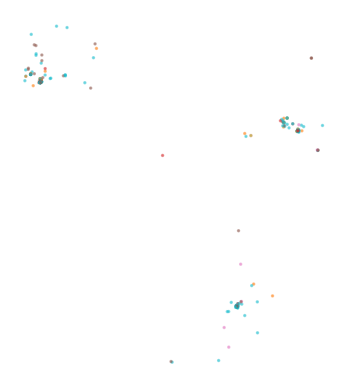

In [57]:
"""
migr1 // "level1_migrations.csv"
"""
dfL = migr1.copy() # (1) - Lines for Map
dfA = ur.copy() # (2) - Attribute Data, Urban-Rural
dfB = in_out_reasons.copy().drop(columns=['lat', 'lon']) # (3) - Attribute Data, Reasons
# display(dfL)
# display(dfA)

print('\nURBAN-RURAL')
df = pd.merge(dfL, dfA, how='left', left_on='location', right_on='Q100_1')
print(df.shape) # check the join
display( df[dfA.columns] )

print('\nREASONS')
df = pd.merge(df, dfB, how='left', left_on='location', right_on='location')
print(df.shape) # check the join 
display( df[dfB.columns] )

## INDEX
sortcols = ['city_8', 'move_count_in', 'move_count_out']
df.sort_values(by=sortcols, axis='index', ascending=False).reset_index(drop=True)
df['ID'] = df.index
display( df[(['location'] + sortcols + ['in_thm', 'out_thm'])] )

## COLUMNS
for i,c in enumerate(df.columns):
    n = df[c].isna().sum()
    print("[{}]\t'{}'\t({} NaN Values)".format(i,c,n))

## SUMMARY STATISTICS
for city in ['Nairobi', 'Johannesburg', 'Accra']: # for each of the three cities...
    ## Have a count of each of the classification categories...
    print('\n************\n'+city+'\n************')
    top_ins = df[df['city_8'].eq(city)]['in_thm'].value_counts()
    print( top_ins ) # ...top incoming reason
    top_outs = df[df['city_8'].eq(city)]['out_thm'].value_counts()
    print( top_outs ) # ...top outgoing reason
    print('\n')

## EXPORT CSV
level1_migrations_UR_R = df.copy()
level1_migrations_UR_R.to_csv("level1_migrations_UR_R.csv") # for generating STAR CHARTS using "star_chart_cities.html"

# use 'out_thm' as line
# use 'in_thm' as point

## CREATE GEOJSON POINTS
gdf = df.set_geometry('geometry') # change to geodataframe by setting geometry back
print(gdf.crs) # check if it has spatial reference, should be WGS85 (EPSG:4326) for lat-lon data

ax1 = gdf.plot(column=gdf['in_thm'], alpha=0.25, markersize=2) # test plot
ax1.set_axis_off()

## EXPORT GEOJSON
## Ref: https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_json.html
display(gdf)
level1_migrations_UR_R_json = gdf.copy()
level1_migrations_UR_R_json.to_file("level1_migrations_UR_R.geojson", driver="GeoJSON")

In [70]:
"""
df // "star_all_distances.csv"
"""
dfL = star[(star.location_type >= 200) & (star.location_type <= 217)].copy() # (1) - Lines for Star Chart, filtered for origins
dfA = in_out_reasons.copy() # (2) - Attribute Data
# display( dfL ) 

df = pd.merge(dfL, dfA, how='left', left_on='location', right_on='location') # merge star origins
# display( df )

df = df.drop_duplicates(subset='ID', keep='last') # remove any duplicate respondent IDs
display( df )

## COLUMNS
for i,c in enumerate(df.columns):
    n = df[c].isna().sum()
    print("[{}]\t'{}'\t({} NaN Values)".format(i,c,n))

## SUMMARY STATISTICS
# for city in ['Nairobi', 'Johannesburg', 'Accra']: # for each of the three cities...
#     ## Have a count of each of the classification categories...
#     print('\n************\n'+city+'\n************')
#     print( df[df['city_8'].eq(city)]['Q100_1_URACMS'].value_counts() ) # ...using ACMS Column 100  
#     print( df[df['city_8'].eq(city)]['Q100_1_URUN'].value_counts() ) # ...using UN WPP population density definition
#     print( df[df['city_8'].eq(city)]['Q100_1_URX'].value_counts() )

star_recent_R = df.copy()
star_recent_R.to_csv('star_recent_R.csv') # for generating the MAP using "map-trajectory.html"


,ID,ID_ordered,location,dist,azimuth,lat_x,lon_x,location_type,max_dist_moves,grouping,...,out_thm,move_count_out,Out_No_Answer,Out_Education,Out_Housing,Out_Kin,Out_Remain,Out_Restart,Out_Safety,Out_Work
1,276785,276785.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,291.141195,moves200,...,(No Answer),75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,276814,276814.03,"('Londiani', 'Kericho', 'Kenya')",177.151211,2.544683,35.591420,-0.167320,211,261.965414,moves200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,276822,276822.01,"('Kedowa', 'Kericho', 'Kenya')",177.832340,2.587015,35.550000,-0.233300,202,261.965414,moves200,...,(No Answer),1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,276934,276934.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,358.790757,moves200,...,(No Answer),75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
8,276935,276935.01,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,152.080705,moves200,...,(No Answer),75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,297635,297635.02,"('Berea', 'Johannesburg', 'South Africa')",0.010000,3.141593,28.053333,-26.182222,206,3820.290903,moves200,...,(No Answer),87.0,87.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1333,297655,297655.01,"('Berea', 'Johannesburg', 'South Africa')",0.010000,3.141593,28.053333,-26.182222,202,500.856512,moves200,...,(No Answer),87.0,87.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1336,297666,297666.03,"('Berea', 'Johannesburg', 'South Africa')",0.010000,3.141593,28.053333,-26.182222,211,355.059231,moves200,...,(No Answer),87.0,87.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1338,297667,297667.02,"('Berea', 'Johannesburg', 'South Africa')",0.010000,3.141593,28.053333,-26.182222,206,1057.252574,moves200,...,(No Answer),87.0,87.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


[0]	'ID'	(0 NaN Values)
[1]	'ID_ordered'	(0 NaN Values)
[2]	'location'	(0 NaN Values)
[3]	'dist'	(0 NaN Values)
[4]	'azimuth'	(0 NaN Values)
[5]	'lat_x'	(0 NaN Values)
[6]	'lon_x'	(0 NaN Values)
[7]	'location_type'	(0 NaN Values)
[8]	'max_dist_moves'	(0 NaN Values)
[9]	'grouping'	(0 NaN Values)
[10]	'location_l'	(0 NaN Values)
[11]	'location_near'	(1 NaN Values)
[12]	'location_country'	(0 NaN Values)
[13]	'city_8'	(0 NaN Values)
[14]	'neighborhood_9'	(0 NaN Values)
[15]	'orig_country_103'	(0 NaN Values)
[16]	'gender_4'	(0 NaN Values)
[17]	'employment_status_303'	(0 NaN Values)
[18]	'number_moves_200'	(0 NaN Values)
[19]	'work_kind_307'	(0 NaN Values)
[20]	'migrant_status_3'	(0 NaN Values)
[21]	'ethnic_group_106'	(0 NaN Values)
[22]	'mother_tongue_115'	(0 NaN Values)
[23]	'refugee_214'	(0 NaN Values)
[24]	'send_money_310'	(0 NaN Values)
[25]	'financial_support_320'	(0 NaN Values)
[26]	'retireOrigindist'	(339 NaN Values)
[27]	'retireOriginaz'	(339 NaN Values)
[28]	'geometry'	(48 NaN Valu

## alldistance

In [13]:
"""
df // "star_all_distances.csv"
"""
dfL = star # [star.location_type.eq(100)].copy() # (1) - Lines for Star Chart, filtered for origins
dfA = ur.copy() # (2) - Attribute Data
display( dfL ) 

df = pd.merge(dfL, ur, how='left', left_on='location', right_on='Q100_1') # merge star origins
display( df )

df = df.drop_duplicates(subset='ID', keep='last') # remove any duplicate respondent IDs
display( df )

## SUMMARY STATISTICS
for city in ['Nairobi', 'Johannesburg', 'Accra']: # for each of the three cities...
    ## Have a count of each of the classification categories...
    print('\n************\n'+city+'\n************')
    print( df[df['city_8'].eq(city)]['Q100_1_URACMS'].value_counts() ) # ...using ACMS Column 100  
    print( df[df['city_8'].eq(city)]['Q100_1_URUN'].value_counts() ) # ...using UN WPP population density definition
    print( df[df['city_8'].eq(city)]['Q100_1_URX'].value_counts() )

star_origins_UR = df.copy()
star_origins_UR.to_csv('star_alldist_UR.csv') # for generating the MAP using "map-trajectory.html"


,ID,ID_ordered,location,dist,azimuth,lon,lat,location_type,max_dist_moves,grouping,...,number_moves_200,work_kind_307,migrant_status_3,ethnic_group_106,mother_tongue_115,refugee_214,send_money_310,financial_support_320,retireOrigindist,retireOriginaz
0,276785,276785.00,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
1,276785,276785.01,"('Manyatta', 'Kisumu', 'Kenya')",291.141195,2.607973,34.481394,0.333309,202,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
2,276785,276785.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
3,276785,276785.06,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,9,291.141195,moves200,...,2,-3,Yes,Luo,Dhluo,No,-3,-3,NaN,NaN
4,276788,276788.00,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,-3,-1,Yes,Luo,Swahili,-3,-1,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,0,Working full-time (formal/informal sector),Yes,Mupedi,Sepedi,No,No,No,9.589894,0.658109
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,2,Self-employed (run small business/income gener...,No,Copi,Portuguese,No,Yes,No,11.136970,0.000832
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,0,Working full-time (formal/informal sector),Yes,Tsonga,Xitsonga,No,Yes,No,153.994931,0.151757
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,2,Working full-time (formal/informal sector),Yes,-3,Sotho,No,Yes,No,1287.397014,0.471683


,ID,ID_ordered,location,dist,azimuth,lon,lat,location_type,max_dist_moves,grouping,...,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
0,276785,276785.00,"('Kisumu', 'Kisumu', 'Kenya')",245.805142,2.688263,34.754176,-0.102911,100,291.141195,moves200,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,24.0
1,276785,276785.01,"('Manyatta', 'Kisumu', 'Kenya')",291.141195,2.607973,34.481394,0.333309,202,291.141195,moves200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,276785,276785.02,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,202,291.141195,moves200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,276785,276785.06,"('Kawangware', 'Nairobi', 'Kenya')",0.010000,3.141593,36.751643,-1.278463,9,291.141195,moves200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,276788,276788.00,"('Oyugis', 'Oyugis', 'Kenya')",234.348325,2.836475,34.734576,-0.509908,100,234.348325,moves200,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,ID,ID_ordered,location,dist,azimuth,lon,lat,location_type,max_dist_moves,grouping,...,Q100_1_URXc,Non-Urban City,Non-Urban Town,Non-Urban Village,Unclassified City,Unclassified Town,Unclassified Village,Urban City,Urban Town,Urban Village
5,276788,276788.06,"('Kawangware', 'nan', 'nan')",0.010000,3.141593,36.751643,-1.278463,9,234.348325,moves200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,278441,278441.06,"('Kawangware', 'nan', 'nan')",0.010000,3.141593,36.751643,-1.278463,9,425.243641,moves200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1474,283981,283981.06,"('Kayole', 'Nairobi', 'Kenya')",0.010000,3.141593,36.916945,-1.265984,9,788.006277,moves200,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1820,284502,284502.06,"('Old Fadama', 'Accra', 'Ghana')",0.010000,0.000000,-0.222522,5.548867,9,266.147114,moves200,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
2333,286404,286404.06,"('Ongata Rongai', 'Nairobi', 'Kenya')",0.010000,3.141593,36.752011,-1.395968,9,238.345215,moves200,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



************
Nairobi
************
Q100_1_URACMS
Village    62
Town       37
City       34
Name: count, dtype: int64
Q100_1_URUN
Urban        117
Non-Urban     16
Name: count, dtype: int64
Q100_1_URX
Urban Village        47
Urban Town           36
Urban City           34
Non-Urban Village    15
Non-Urban Town        1
Name: count, dtype: int64

************
Johannesburg
************
Q100_1_URACMS
Town       49
Village    37
City       15
Name: count, dtype: int64
Q100_1_URUN
Urban           89
Non-Urban       10
Unclassified     2
Name: count, dtype: int64
Q100_1_URX
Urban Town           46
Urban Village        33
Urban City           10
Non-Urban City        5
Non-Urban Village     4
Unclassified Town     2
Non-Urban Town        1
Name: count, dtype: int64

************
Accra
************
Q100_1_URACMS
City       50
Town       43
Village     1
Name: count, dtype: int64
Q100_1_URUN
Urban           84
Unclassified     9
Non-Urban        1
Name: count, dtype: int64
Q100_1_URX
Urban City 

In [12]:
"""
df // "star_all_distances.csv"
"""
# dfL = star[(star.location_type >= 200) & (star.location_type <= 217)].copy() # (1) - Lines for Star Chart, filtered for origins
dfL = star
dfA = in_out_reasons.copy() # (2) - Attribute Data
# display( dfL ) 

df = pd.merge(dfL, dfA, how='left', left_on='location', right_on='location') # merge star origins
# display( df )

df = df.drop_duplicates(subset='ID', keep='last') # remove any duplicate respondent IDs
display( df )

## COLUMNS
for i,c in enumerate(df.columns):
    n = df[c].isna().sum()
    print("[{}]\t'{}'\t({} NaN Values)".format(i,c,n))

## SUMMARY STATISTICS
# for city in ['Nairobi', 'Johannesburg', 'Accra']: # for each of the three cities...
#     ## Have a count of each of the classification categories...
#     print('\n************\n'+city+'\n************')
#     print( df[df['city_8'].eq(city)]['Q100_1_URACMS'].value_counts() ) # ...using ACMS Column 100  
#     print( df[df['city_8'].eq(city)]['Q100_1_URUN'].value_counts() ) # ...using UN WPP population density definition
#     print( df[df['city_8'].eq(city)]['Q100_1_URX'].value_counts() )

# star_recent_R = df.copy()
# star_recent_R.to_csv('star_recent_R.csv') # for generating the MAP using "map-trajectory.html"


,ID,ID_ordered,location,dist,azimuth,lon_x,lat_x,location_type,max_dist_moves,grouping,...,move_cou_1,Out_No_Ans,Out_Educat,Out_Housin,Out_Kin,Out_Remain,Out_Restar,Out_Safety,Out_Work,geometry
5,276788,276788.06,"('Kawangware', 'nan', 'nan')",0.010000,3.141593,36.751643,-1.278463,9,234.348325,moves200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
240,278441,278441.06,"('Kawangware', 'nan', 'nan')",0.010000,3.141593,36.751643,-1.278463,9,425.243641,moves200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1474,283981,283981.06,"('Kayole', 'Nairobi', 'Kenya')",0.010000,3.141593,36.916945,-1.265984,9,788.006277,moves200,...,73.0,73.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,POINT (36.91695 -1.26598)
1820,284502,284502.06,"('Old Fadama', 'Accra', 'Ghana')",0.010000,0.000000,-0.222522,5.548867,9,266.147114,moves200,...,63.0,63.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,POINT (-0.22252 5.54887)
2333,286404,286404.06,"('Ongata Rongai', 'Nairobi', 'Kenya')",0.010000,3.141593,36.752011,-1.395968,9,238.345215,moves200,...,71.0,71.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,POINT (36.75201 -1.39597)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,297654,297654.00,"('Cosmo City', 'Randburg', 'South Africa')",20.811756,2.281284,27.930757,-26.021935,344,NaN,future,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (27.93076 -26.02193)
19915,297655,297655.00,"('Matola', 'Maputo', 'South Africa')",124.648052,0.248199,29.143194,-25.867549,344,NaN,future,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
19916,297656,297656.00,"('Soweto', 'Johannesburg', 'South Africa')",18.535022,-2.924451,27.890000,-26.222778,344,NaN,future,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,POINT (27.89000 -26.22278)
19917,297660,297660.00,"('Houghton', 'Johannesburg', 'South Africa')",1305.932037,-2.452768,18.733376,-34.022894,344,NaN,future,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (18.73338 -34.02289)


[0]	'ID'	(0 NaN Values)
[1]	'ID_ordered'	(0 NaN Values)
[2]	'location'	(0 NaN Values)
[3]	'dist'	(65 NaN Values)
[4]	'azimuth'	(65 NaN Values)
[5]	'lon_x'	(0 NaN Values)
[6]	'lat_x'	(0 NaN Values)
[7]	'location_type'	(0 NaN Values)
[8]	'max_dist_moves'	(1634 NaN Values)
[9]	'grouping'	(0 NaN Values)
[10]	'location_l'	(18 NaN Values)
[11]	'location_near'	(11 NaN Values)
[12]	'location_country'	(4 NaN Values)
[13]	'city_8'	(0 NaN Values)
[14]	'neighborhood_9'	(0 NaN Values)
[15]	'orig_country_103'	(0 NaN Values)
[16]	'gender_4'	(0 NaN Values)
[17]	'employment_status_303'	(0 NaN Values)
[18]	'number_moves_200'	(0 NaN Values)
[19]	'work_kind_307'	(0 NaN Values)
[20]	'migrant_status_3'	(0 NaN Values)
[21]	'ethnic_group_106'	(0 NaN Values)
[22]	'mother_tongue_115'	(1 NaN Values)
[23]	'refugee_214'	(0 NaN Values)
[24]	'send_money_310'	(0 NaN Values)
[25]	'financial_support_320'	(0 NaN Values)
[26]	'retireOrigindist'	(676 NaN Values)
[27]	'retireOriginaz'	(676 NaN Values)
[28]	'lat_y'	(1116 Na